# ƒê·ªÅ t√†i: Ph√¢n t√≠ch c·∫£m nghƒ© ng∆∞·ªùi d√πng v·ªÅ s·∫£n ph·∫©m c√¥ng ngh·ªá tr√™n Reddit

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install asyncpraw emoji contractions

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 196.4/196.4 kB 6.7 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 590.6/590.6 kB 16.0 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 289.9/289.9 kB 17.2 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 118.3/118.3 kB 5.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import string
import os
import warnings
import emoji
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import time
import pickle
warnings.filterwarnings('ignore')

## 1. Chu·∫©n b·ªã d·ªØ li·ªáu

### 1.1. Thu th·∫≠p d·ªØ li·ªáu

In [ ]:
import asyncpraw  # S·ª≠ d·ª•ng cho colab
import asyncio
import pandas as pd

# T√°ch lu·ªìng ri√™ng
import nest_asyncio
nest_asyncio.apply()

async def collect_reddit_data():
    # Thi·∫øt l·∫≠p k·∫øt n·ªëi v·ªõi Reddit
    reddit = asyncpraw.Reddit(
        client_id="vawf1ksMlZvt40z5fPQnOg",
        client_secret="xEPH62kQkyHBhIUEL30wIzC1A7rrww",
        user_agent='user sentiment analysis'
    )

    # Danh s√°ch c√°c t·ª´ kh√≥a t√¨m ki·∫øm
    brands = ['iPhone', 'Samsung', 'Xiaomi']

    # H√†m ki·ªÉm tra xem b√¨nh lu·∫≠n c√≥ ch·ª©a t·ª´ kh√≥a n√†o kh√¥ng
    def get_brand_from_text(text, brands):
        for brand in brands:
            if brand.lower() in text.lower():
                return brand
        return None

    # Danh s√°ch c√°c subreddit
    subreddits = ['technology', 'gadgets', 'android', 'apple', 'smartphones']
    comments_data = []

    for subreddit_name in subreddits:
        print(f"ƒêang thu th·∫≠p t·ª´ r/{subreddit_name}...")
        subreddit = await reddit.subreddit(subreddit_name)

        # Ch·ªâ thu th·∫≠p b√†i vi·∫øt HOT
        print(f"  ƒêang thu th·∫≠p b√†i vi·∫øt hot...")
        async for post in subreddit.hot(limit=100):
            try:
                # N·∫°p l·∫°i post ƒë·ªÉ ch·∫Øc ch·∫Øn c√≥ ƒë·ªß d·ªØ li·ªáu
                post = await reddit.submission(id=post.id)

                print(f"    ƒêang thu th·∫≠p b√¨nh lu·∫≠n t·ª´ b√†i vi·∫øt: {post.title[:50]}...")

                # M·ªü r·ªông "load more" v√† l·∫•y t·∫•t c·∫£ comment
                await post.comments.replace_more(limit=10)
                all_comments = post.comments.list()

                # Duy·ªát qua t·ª´ng comment
                for comment in all_comments:
                    if hasattr(comment, 'body'):
                        brand = get_brand_from_text(comment.body, brands)
                        if brand:
                            try:
                                author_name = comment.author.name if comment.author else 'deleted'
                            except:
                                author_name = 'deleted'

                            comments_data.append({
                                'brand': brand,
                                'subreddit': subreddit_name,
                                'post_id': post.id,
                                'post_title': post.title,
                                'comment_id': comment.id,
                                'comment_body': comment.body,
                                'comment_author': author_name,
                                'comment_score': comment.score,
                                'comment_time': comment.created_utc
                            })

                print(f"    ƒê√£ thu th·∫≠p {len(all_comments)} b√¨nh lu·∫≠n, t√¨m th·∫•y {sum(1 for c in comments_data if c['post_id'] == post.id)} b√¨nh lu·∫≠n c√≥ th∆∞∆°ng hi·ªáu")

            except Exception as e:
                print(f"    L·ªói khi thu th·∫≠p b√†i vi·∫øt: {str(e)}")
                continue

    # In th·ª≠ 5 comment ƒë·∫ßu ti√™n
    print("\nM·∫´u d·ªØ li·ªáu thu th·∫≠p ƒë∆∞·ª£c:")
    for i, comment in enumerate(comments_data[:5]):
        print(f"{i+1}. Brand: {comment['brand']} (r/{comment['subreddit']})\n{comment['comment_body'][:100]}...\n")

    # L∆∞u v√†o CSV
    df = pd.DataFrame(comments_data)
    df.to_csv('/content/drive/MyDrive/BTL_Data Mining/Dataset/raw/reddit_comments.csv', index=False)
    print(f"ƒê√£ l∆∞u {len(df)} b√¨nh lu·∫≠n v√†o file reddit_comments.csv")

    await reddit.close()
    return df

# Ch·∫°y h√†m thu th·∫≠p
async def main():
    print("B·∫Øt ƒë·∫ßu thu th·∫≠p d·ªØ li·ªáu t·ª´ Reddit...")
    df = await collect_reddit_data()
    print(f"Ho√†n th√†nh! ƒê√£ thu th·∫≠p t·ªïng c·ªông {len(df)} b√¨nh lu·∫≠n.")

# Ch·∫°y trong m√¥i tr∆∞·ªùng local
if __name__ == "__main__":
    loop = asyncio.get_event_loop()
    loop.run_until_complete(main())


B·∫Øt ƒë·∫ßu thu th·∫≠p d·ªØ li·ªáu t·ª´ Reddit...
ƒêang thu th·∫≠p t·ª´ r/technology...
  ƒêang thu th·∫≠p b√†i vi·∫øt hot...
    ƒêang thu th·∫≠p b√¨nh lu·∫≠n t·ª´ b√†i vi·∫øt: 4Chan hacked; Taken down; Emails and IPs leaked...
    ƒê√£ thu th·∫≠p 1300 b√¨nh lu·∫≠n, t√¨m th·∫•y 0 b√¨nh lu·∫≠n c√≥ th∆∞∆°ng hi·ªáu
    ƒêang thu th·∫≠p b√¨nh lu·∫≠n t·ª´ b√†i vi·∫øt: EU gives staff 'burner phones, laptops' for US vis...
    ƒê√£ thu th·∫≠p 144 b√¨nh lu·∫≠n, t√¨m th·∫•y 0 b√¨nh lu·∫≠n c√≥ th∆∞∆°ng hi·ªáu
    ƒêang thu th·∫≠p b√¨nh lu·∫≠n t·ª´ b√†i vi·∫øt: Mark Zuckerberg considered deleting everyone's Fac...
    ƒê√£ thu th·∫≠p 342 b√¨nh lu·∫≠n, t√¨m th·∫•y 0 b√¨nh lu·∫≠n c√≥ th∆∞∆°ng hi·ªáu
    ƒêang thu th·∫≠p b√¨nh lu·∫≠n t·ª´ b√†i vi·∫øt: After Harvard says no to feds, $2.2 billion of res...
    ƒê√£ thu th·∫≠p 184 b√¨nh lu·∫≠n, t√¨m th·∫•y 0 b√¨nh lu·∫≠n c√≥ th∆∞∆°ng hi·ªáu
    ƒêang thu th·∫≠p b√¨nh lu·∫≠n t·ª´ b√†i vi·∫øt: ‚ÄòSilicon Six‚Äô accused of avoiding almost $278bn in...
 

### 1.2. T√¨m hi·ªÉu d·ªØ li·ªáu

In [179]:
df = pd.read_csv('/content/drive/MyDrive/BTL_Data_Mining/Dataset/raw/reddit_comments.csv')

In [180]:
# Display first few rows
print("Dataset preview:")
df.head()

Dataset preview:


brand   subreddit  post_id  \
0   iPhone  technology  1jz8a7h   
1   iPhone  technology  1jzq9em   
2  Samsung  technology  1jyy5ah   
3   iPhone  technology  1jzimiv   
4   iPhone  technology  1jyz3h0   

                                          post_title comment_id  \
0  Facebook isn't really for friends anymore, Mar...    mn6elqr   
1  Trump Exempts Tech Gear From Huge Tariffs, Tem...    mn81bue   
2  Microsoft warns that anyone who deleted myster...    mn5u1fd   
3  Microsoft OneDrive file sync apps for Windows,...    mn8kv6f   
4  She was chatting with friends in a Lyft. Then ...    mn45riy   

                                        comment_body        comment_author  \
0  Has anyone else noticed that FB now suggests *...     Wonderful-Bid9471   
1  Anyone not rich enough to buy an iPhone gets t...  Suspicious-Town-7688   
2  Reddit has been total shit since whatever they...      AnonymousBanana7   
3  If you‚Äôre on Mac and likely to have a iPhone f...         Noname_Maddox   
4  Considering she said that a ‚Äúdriver is not ava...  FISHING_100000000000   

   comment_score  comment_time  
0              1  1.744688e+09  
1              3  1.744720e+09  
2              3  1.744680e+09  
3              1  1.744727e+09  
4            141  1.744660e+09

In [181]:
# Dataset information
print("\nDataset information:")
df.info()


Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   brand           2550 non-null   object 
 1   subreddit       2550 non-null   object 
 2   post_id         2550 non-null   object 
 3   post_title      2550 non-null   object 
 4   comment_id      2550 non-null   object 
 5   comment_body    2550 non-null   object 
 6   comment_author  2550 non-null   object 
 7   comment_score   2550 non-null   int64  
 8   comment_time    2550 non-null   float64
dtypes: float64(1), int64(1), object(7)
memory usage: 179.4+ KB


In [182]:
# Statistical summary
print("\nStatistical summary:")
print(df.describe())


Statistical summary:
       comment_score  comment_time
count    2550.000000  2.550000e+03
mean       15.354118  1.743994e+09
std        99.123133  9.699403e+05
min       -43.000000  1.739932e+09
25%         1.000000  1.743858e+09
50%         1.000000  1.744241e+09
75%         5.000000  1.744551e+09
max      2456.000000  1.744741e+09


In [183]:
# 1. Missing Values
print("\n----- Missing Values Analysis -----")
missing_values = df.isnull().sum()
print(f"Total missing values: {missing_values.sum()}")
if missing_values.sum() > 0:
    print("\nMissing values by column:")
    print(missing_values[missing_values > 0])


----- Missing Values Analysis -----
Total missing values: 0


In [184]:
# 2. Duplicate Detection
duplicates = df.duplicated().sum()
print(f"\nDuplicate rows: {duplicates} ({duplicates/len(df)*100:.2f}%)")


Duplicate rows: 0 (0.00%)


In [185]:
# 3. Comments per brand
brand_counts = df['brand'].value_counts()
print("\nComments per brand:")
print(brand_counts)


Comments per brand:
brand
iPhone     1876
Samsung     606
Xiaomi       68
Name: count, dtype: int64


In [186]:
# 4. Comments per subreddit
subreddit_counts = df['subreddit'].value_counts()
print("\nComments per subreddit:")
print(subreddit_counts)


Comments per subreddit:
subreddit
apple          1536
gadgets         362
android         298
smartphones     292
technology       62
Name: count, dtype: int64


In [187]:
# 5. Comment length statistics
df['comment_length'] = df['comment_body'].apply(len)
df['word_count'] = df['comment_body'].apply(lambda x: len(str(x).split()))

print("\nComment length statistics:")
print(df[['comment_length', 'word_count']].describe())


Comment length statistics:
       comment_length   word_count
count     2550.000000  2550.000000
mean       327.807451    57.696471
std        435.705936    73.257348
min          8.000000     1.000000
25%        100.000000    19.000000
50%        203.000000    37.000000
75%        384.000000    69.000000
max       6734.000000  1076.000000


In [188]:
# 8. Distribution check for extremely short or long comments
short_comments = len(df[df['word_count'] < 5])
long_comments = len(df[df['word_count'] > 200])
print(f"\nExtremely short comments (<5 words): {short_comments} ({short_comments/len(df)*100:.2f}%)")
print(f"Extremely long comments (>200 words): {long_comments} ({long_comments/len(df)*100:.2f}%)")


Extremely short comments (<5 words): 51 (2.00%)
Extremely long comments (>200 words): 98 (3.84%)


In [189]:
# 9. Sample of comments
print("\n----- Sample Comments -----")
for brand in df['brand'].unique():
    print(f"\nSample comments for {brand}:")
    samples = df[df['brand'] == brand].sample(min(3, len(df[df['brand'] == brand])))
    for _, row in samples.iterrows():
        print(f"- {row['comment_body'][:100]}...")


----- Sample Comments -----

Sample comments for iPhone:
- All of those are third party apps though. Once the AT&T exclusivity ended with the 4s and way more o...
- Those are basic functions no one is excited about. Phones within the iPhone‚Äôs price point can scroll...
- Was thinking about waiting until the end of the year to upgrade to an iPhone 17, but with the tariff...

Sample comments for Samsung:
- So many Beta versions with months of delay and STILL such shit happens.

Well done Samsung....
- I switched to samsung from pixel because I didn't need the updates so fast...little did I know...
- I'll be honest, I would love for Apple (and Samsung) to go to two year cycles. That would afford the...

Sample comments for Xiaomi:
- Xiaomi Redmi Note 14 Pro 5G for sure...
- Xiaomi Redmi K80 Pro

OnePlus Ace 5 Pro

Realme GT7 Pro Racing...
- Can't speak for previous iterations of Xiaomi Ultra, but 15 is balanced in the center despite the ma...


In [190]:
# 10. Top posts with most comments
post_counts = df.groupby(['post_id', 'post_title']).size().reset_index(name='comment_count')
top_posts = post_counts.sort_values('comment_count', ascending=False).head(10)
print("\nTop 10 posts with most comments:")
for _, row in top_posts.iterrows():
    print(f"- {row['post_title'][:50]}... ({row['comment_count']} comments)")


Top 10 posts with most comments:
- iPhones Could Cost Up to $2,300 in the U.S. Due to... (124 comments)
- Teen iPhone Ownership Continues to Soar... (119 comments)
- Apple iPhone Price Hikes Are Now Looking Possible ... (90 comments)
- Apple is racing to fly planes of iPhones into the ... (82 comments)
- Samsung admits a bad software update has been bric... (78 comments)
- A 'US-Made iPhone' Is Pure Fantasy... (67 comments)
- Trump Believes Apple Could Manufacture iPhones in ... (66 comments)
- Apple Planning 'Bold' New 20th Anniversary Design ... (59 comments)
- Apple launches the iPhone 16E... (59 comments)
- Breaking: One UI 7 update halted worldwide - Andro... (56 comments)


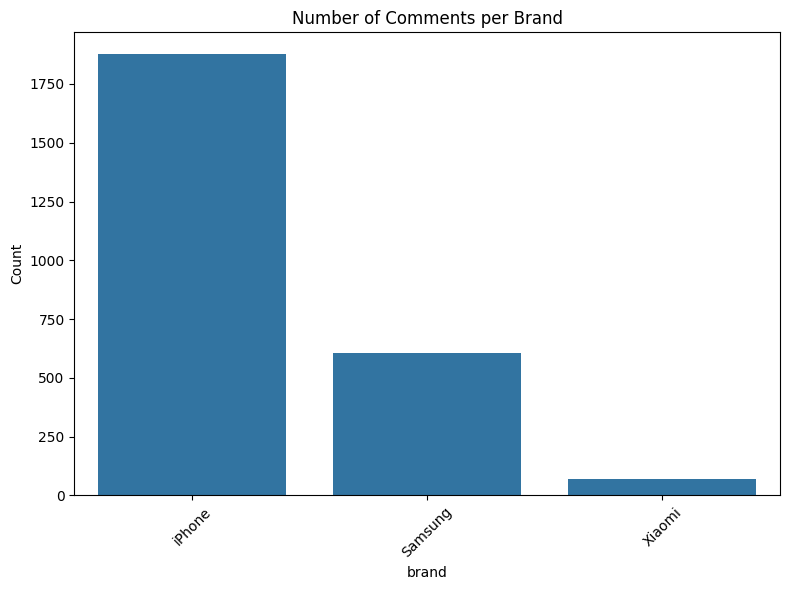

In [191]:
# Plot 1: Comments per brand
plt.figure(figsize=(8, 6))
sns.barplot(x=brand_counts.index, y=brand_counts.values)
plt.title('Number of Comments per Brand')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

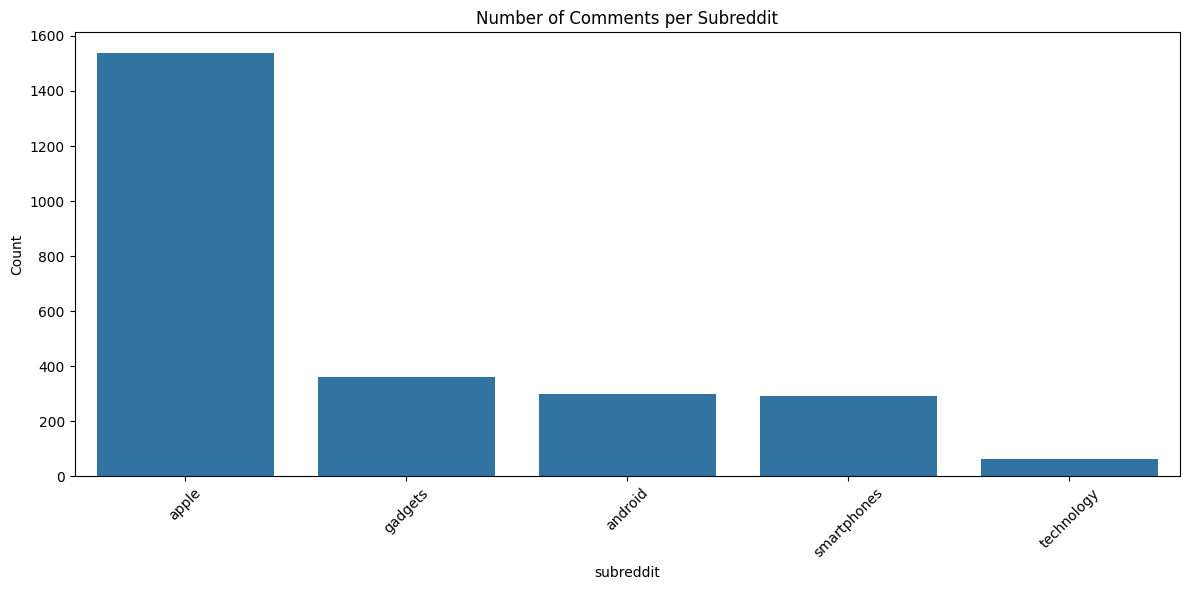

In [192]:
# Plot 2: Comments per subreddit
plt.figure(figsize=(12, 6))
sns.barplot(x=subreddit_counts.index, y=subreddit_counts.values)
plt.title('Number of Comments per Subreddit')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

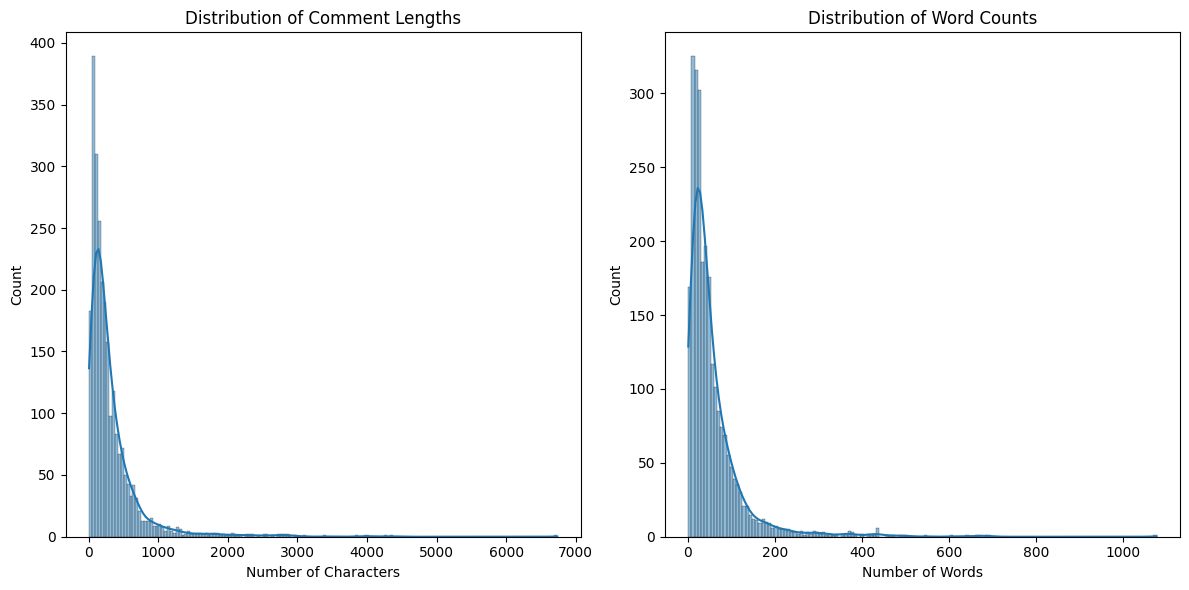

In [193]:
# Plot 3: Distribution of comment lengths
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['comment_length'], kde=True)
plt.title('Distribution of Comment Lengths')
plt.xlabel('Number of Characters')

plt.subplot(1, 2, 2)
sns.histplot(df['word_count'], kde=True)
plt.title('Distribution of Word Counts')
plt.xlabel('Number of Words')

plt.tight_layout()
plt.show()

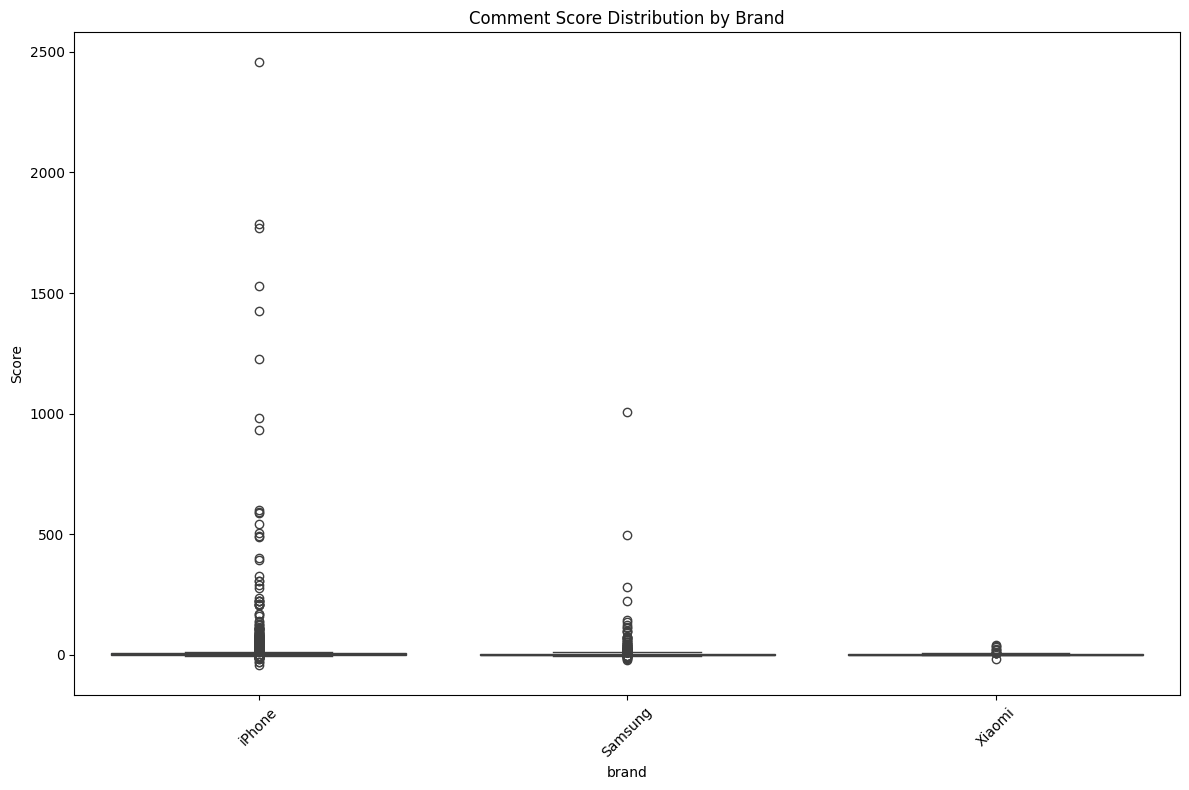

In [194]:
# Plot 4: Comment score distribution by brand
plt.figure(figsize=(12, 8))
sns.boxplot(x='brand', y='comment_score', data=df)
plt.title('Comment Score Distribution by Brand')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 2. Ti·ªÅn x·ª≠ l√Ω d·ªØ li·ªáu

In [195]:
# Download NLTK resources
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)

True

### 2.1. Ki·ªÉm tra d·ªØ li·ªáu thi·∫øu v√† tr√πng l·∫∑p

In [196]:
# ## 1. Ki·ªÉm tra d·ªØ li·ªáu thi·∫øu v√† lo·∫°i b·ªè duplicate
print("\n== Ki·ªÉm tra v√† l√†m s·∫°ch d·ªØ li·ªáu ==")

# Ki·ªÉm tra gi√° tr·ªã null
print("----- Handling Missing Values -----")
missing_values = df.isnull().sum()
print(f"Total missing values: {missing_values.sum()}")

if missing_values.sum() > 0:
    initial_count = len(df)
    processed_df = df.dropna(subset=['comment_body'])
    print(f"Removed {initial_count - len(df)} rows with missing comment_body")

# Ki·ªÉm tra c√°c b√¨nh lu·∫≠n tr√πng l·∫∑p
print("\n----- Removing Duplicates -----")
duplicates = df.duplicated(subset=['comment_body']).sum()
print(f"\nS·ªë l∆∞·ª£ng b√¨nh lu·∫≠n tr√πng l·∫∑p: {duplicates}")

# Lo·∫°i b·ªè c√°c b√¨nh lu·∫≠n tr√πng l·∫∑p
df = df.drop_duplicates(subset=['comment_body'])
print(f"K√≠ch th∆∞·ªõc d·ªØ li·ªáu sau khi lo·∫°i b·ªè duplicate: {df.shape}")


== Ki·ªÉm tra v√† l√†m s·∫°ch d·ªØ li·ªáu ==
----- Handling Missing Values -----
Total missing values: 0

----- Removing Duplicates -----

S·ªë l∆∞·ª£ng b√¨nh lu·∫≠n tr√πng l·∫∑p: 6
K√≠ch th∆∞·ªõc d·ªØ li·ªáu sau khi lo·∫°i b·ªè duplicate: (2544, 11)


### 2.2. Ph√¢n t√≠ch s∆° b·ªô v·ªÅ ƒë·ªô d√†i comment


== Ph√¢n t√≠ch ƒë·ªô d√†i b√¨nh lu·∫≠n ==
Th·ªëng k√™ v·ªÅ ƒë·ªô d√†i b√¨nh lu·∫≠n:
       comment_length  comment_word_count
count     2544.000000         2544.000000
mean       328.284198           57.777123
std        436.074381           73.317598
min          8.000000            1.000000
25%        100.000000           19.000000
50%        203.000000           37.000000
75%        384.000000           69.000000
max       6734.000000         1076.000000


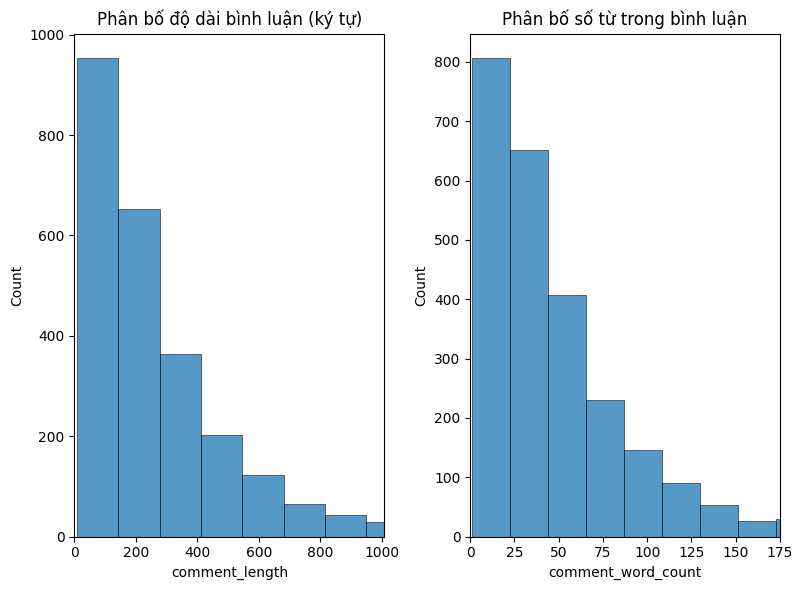

ƒê√£ l∆∞u bi·ªÉu ƒë·ªì ph√¢n b·ªë ƒë·ªô d√†i b√¨nh lu·∫≠n


In [197]:
# ## 2. Ph√¢n t√≠ch s∆° b·ªô v·ªÅ ƒë·ªô d√†i b√¨nh lu·∫≠n
print("\n== Ph√¢n t√≠ch ƒë·ªô d√†i b√¨nh lu·∫≠n ==")

# Th√™m c·ªôt ƒë·ªô d√†i b√¨nh lu·∫≠n
df['comment_length'] = df['comment_body'].apply(len)
df['comment_word_count'] = df['comment_body'].apply(lambda x: len(str(x).split()))

# Th·ªëng k√™ v·ªÅ ƒë·ªô d√†i
print("Th·ªëng k√™ v·ªÅ ƒë·ªô d√†i b√¨nh lu·∫≠n:")
print(df[['comment_length', 'comment_word_count']].describe())

# V·∫Ω bi·ªÉu ƒë·ªì ph√¢n b·ªë ƒë·ªô d√†i
plt.figure(figsize=(8, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['comment_length'], bins=50)
plt.title('Ph√¢n b·ªë ƒë·ªô d√†i b√¨nh lu·∫≠n (k√Ω t·ª±)')
plt.xlim(0, df['comment_length'].quantile(0.95))

plt.subplot(1, 2, 2)
sns.histplot(df['comment_word_count'], bins=50)
plt.title('Ph√¢n b·ªë s·ªë t·ª´ trong b√¨nh lu·∫≠n')
plt.xlim(0, df['comment_word_count'].quantile(0.95))
plt.tight_layout()
plt.show()
print("ƒê√£ l∆∞u bi·ªÉu ƒë·ªì ph√¢n b·ªë ƒë·ªô d√†i b√¨nh lu·∫≠n")

C·∫£ hai bi·ªÉu ƒë·ªì ƒë·ªÅu cho th·∫•y r·∫±ng ph·∫ßn l·ªõn b√¨nh lu·∫≠n trong d·ªØ li·ªáu c√≥ ƒë·ªô d√†i v√† s·ªë t·ª´ t∆∞∆°ng ƒë·ªëi ng·∫Øn

### 2.3. Chuy·ªÉn ƒë·ªïi emoji

In [198]:
# ## 3. Chuy·ªÉn ƒë·ªïi emoji
# Tr√≠ch emoji ra th√†nh list (d·ªÖ quan s√°t h∆°n)
def extract_emojis_list(text):
    """Tr√≠ch xu·∫•t emoji d∆∞·ªõi d·∫°ng list t·ª´ chu·ªói vƒÉn b·∫£n"""
    if not isinstance(text, str):
        return []
    return [char for char in text if char in emoji.EMOJI_DATA]

# Th√™m c·ªôt emojis_list
df['emojis_list'] = df['comment_body'].apply(extract_emojis_list)

# L·ªçc c√°c b√¨nh lu·∫≠n c√≥ emoji
df_with_emoji = df[df['emojis_list'].apply(lambda x: len(x) > 0)]

# In th·ª≠ m·ªôt s·ªë m·∫´u c√≥ emoji
print("üìå M·ªôt s·ªë v√≠ d·ª• b√¨nh lu·∫≠n c√≥ emoji:\n")
for i, (_, row) in enumerate(df_with_emoji.head(2).iterrows()):
    print(f"üîπ B√¨nh lu·∫≠n {i+1}:")
    print("  N·ªôi dung:", row['comment_body'][:150], "...")
    print("  Emoji t√¨m th·∫•y:", " ".join(row['emojis_list']))
    print()

# T·ªïng s·ªë emoji
total_emojis = sum(len(e_list) for e_list in df['emojis_list'])
print(f"üìä T·ªïng s·ªë emoji ƒë∆∞·ª£c t√¨m th·∫•y trong to√†n b·ªô d·ªØ li·ªáu: {total_emojis}")

üìå M·ªôt s·ªë v√≠ d·ª• b√¨nh lu·∫≠n c√≥ emoji:

üîπ B√¨nh lu·∫≠n 1:
  N·ªôi dung: So he is now manipulating individual stocks for him and his buddies to profit off of. Pretty bold to just openly yank stock prices up and down buying  ...
  Emoji t√¨m th·∫•y: ü§î

üîπ B√¨nh lu·∫≠n 2:
  N·ªôi dung: Yep if iphones and McDonald's become more expensive we will have a revolution on our hands üòÇ ...
  Emoji t√¨m th·∫•y: üòÇ

üìä T·ªïng s·ªë emoji ƒë∆∞·ª£c t√¨m th·∫•y trong to√†n b·ªô d·ªØ li·ªáu: 101


In [199]:
# H√†m thay th·∫ø emoji b·∫±ng t√™n m√¥ t·∫£ (d·∫°ng :face_with_tears_of_joy:) v√† l∆∞u l·∫°i c·∫∑p thay th·∫ø
def replace_emojis_with_text_verbose(text):
    if not isinstance(text, str):
        return text, []

    replaced = []
    new_text = ""
    for char in text:
        if char in emoji.EMOJI_DATA:
            emoji_text = emoji.demojize(char, language='en')
            replaced.append((char, emoji_text))
            new_text += emoji_text
        else:
            new_text += char
    return new_text, replaced

# √Åp d·ª•ng l√™n c·ªôt 'comment_body'
df[['comment_body_with_emoji_text', 'emoji_replacements']] = df['comment_body'].apply(
    lambda x: pd.Series(replace_emojis_with_text_verbose(x))
)

# In th·ª≠ m·ªôt s·ªë v√≠ d·ª•
print("üìå M·ªôt s·ªë v√≠ d·ª• b√¨nh lu·∫≠n sau khi thay emoji b·∫±ng m√¥ t·∫£:\n")
for i, (_, row) in enumerate(df[df['emoji_replacements'].apply(len) > 0].head(2).iterrows()):
    print(f"üîπ B√¨nh lu·∫≠n {i+1}:")
    print("  üî∏ Tr∆∞·ªõc:\n  ", row['comment_body'][:200], "...")
    print("  üî∏ Sau khi thay:\n  ", row['comment_body_with_emoji_text'][:200], "...")
    print("  üî∏ Emoji ƒë√£ thay:")
    for emoji_char, emoji_text in row['emoji_replacements']:
        print(f"     ‚ûú '{emoji_char}'  ‚Üí  '{emoji_text}'")
    print()

üìå M·ªôt s·ªë v√≠ d·ª• b√¨nh lu·∫≠n sau khi thay emoji b·∫±ng m√¥ t·∫£:

üîπ B√¨nh lu·∫≠n 1:
  üî∏ Tr∆∞·ªõc:
   So he is now manipulating individual stocks for him and his buddies to profit off of. Pretty bold to just openly yank stock prices up and down buying up the dips. I thought a president couldn't enrich ...
  üî∏ Sau khi thay:
   So he is now manipulating individual stocks for him and his buddies to profit off of. Pretty bold to just openly yank stock prices up and down buying up the dips. I thought a president couldn't enrich ...
  üî∏ Emoji ƒë√£ thay:
     ‚ûú 'ü§î'  ‚Üí  ':thinking_face:'

üîπ B√¨nh lu·∫≠n 2:
  üî∏ Tr∆∞·ªõc:
   Yep if iphones and McDonald's become more expensive we will have a revolution on our hands üòÇ ...
  üî∏ Sau khi thay:
   Yep if iphones and McDonald's become more expensive we will have a revolution on our hands :face_with_tears_of_joy: ...
  üî∏ Emoji ƒë√£ thay:
     ‚ûú 'üòÇ'  ‚Üí  ':face_with_tears_of_joy:'



### 2.4. Ti·ªÅn x·ª≠ l√Ω d·ªØ li·ªáu

In [200]:
# ## 4. Ti·ªÅn x·ª≠ l√Ω vƒÉn b·∫£n
print("\n== Ti·ªÅn x·ª≠ l√Ω vƒÉn b·∫£n (C·∫£i ti·∫øn cho ph√¢n t√≠ch c·∫£m x√∫c) ==")

# T·∫°o danh s√°ch c√°c t·ª´ ph·ªß ƒë·ªãnh c·∫ßn gi·ªØ l·∫°i
negation_words = {'not', 'no', 'never', 'none', 'neither', 'nor', 'nothing', 'nowhere', 'hardly', 'barely', 'scarcely', 'doesn', 'isn', 'wasn', 'shouldn', 'wouldn', 'couldn', 'won', 'don'}

# T·∫°o danh s√°ch stopwords nh∆∞ng lo·∫°i b·ªè c√°c t·ª´ ph·ªß ƒë·ªãnh
custom_stopwords = set(stopwords.words('english'))
custom_stopwords = {word for word in custom_stopwords if word not in negation_words}

# H√†m ti·ªÅn x·ª≠ l√Ω c·∫£i ti·∫øn cho ph√¢n t√≠ch c·∫£m x√∫c
def preprocess_text_enhanced(text):
    """H√†m ti·ªÅn x·ª≠ l√Ω vƒÉn b·∫£n ƒë∆∞·ª£c c·∫£i ti·∫øn cho ph√¢n t√≠ch c·∫£m x√∫c"""
    if not isinstance(text, str):
        return ""

    # Chuy·ªÉn v·ªÅ ch·ªØ th∆∞·ªùng
    text = text.lower()

    # X·ª≠ l√Ω t·ª´ ph·ªß ƒë·ªãnh ƒë·∫∑c bi·ªát - th√™m d·∫•u _ ƒë·ªÉ gi·ªØ li√™n k·∫øt ng·ªØ nghƒ©a
    # V√≠ d·ª•: "not good" -> "not_good"
    negation_pattern = r'\b(' + '|'.join(negation_words) + r')\s+(\w+)'
    text = re.sub(negation_pattern, r'\1_\2', text)

    # Lo·∫°i b·ªè URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Lo·∫°i b·ªè HTML tags
    text = re.sub(r'<.*?>', '', text)

    # Lo·∫°i b·ªè c√°c t√†i kho·∫£n ng∆∞·ªùi d√πng (nh∆∞ @username)
    text = re.sub(r'@\w+', '', text)

    # Thay th·∫ø s·ªë b·∫±ng token <NUM>
    text = re.sub(r'\d+', ' <NUM> ', text)

    # X·ª≠ l√Ω d·∫•u c√¢u ƒë·∫∑c bi·ªát ƒë·ªÉ ph√¢n t√≠ch c·∫£m x√∫c
    text = re.sub(r'!+', ' <EXCLAMATION> ', text)  # nhi·ªÅu d·∫•u ch·∫•m than
    text = re.sub(r'\?+', ' <QUESTION> ', text)    # nhi·ªÅu d·∫•u h·ªèi

    # Lo·∫°i b·ªè c√°c k√Ω t·ª± ƒë·∫∑c bi·ªát c√≤n l·∫°i (gi·ªØ l·∫°i d·∫•u space)
    text = re.sub(r'[^\w\s<>_]', ' ', text)

    # Tokenization ƒë∆°n gi·∫£n
    tokens = text.split()

    # Lo·∫°i b·ªè stopwords, nh∆∞ng gi·ªØ l·∫°i t·ª´ ph·ªß ƒë·ªãnh
    tokens = [word for word in tokens if word not in custom_stopwords]

    # Lemmatization (kh√¥ng √°p d·ª•ng cho t·ª´ ph·ªß ƒë·ªãnh k·∫øt h·ª£p v√† tokens ƒë·∫∑c bi·ªát)
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) if not (word.startswith('<') or '_' in word) else word
             for word in tokens]

    # Lo·∫°i b·ªè c√°c t·ª´ qu√° ng·∫Øn, tr·ª´ tokens ƒë·∫∑c bi·ªát v√† t·ª´ ph·ªß ƒë·ªãnh k·∫øt h·ª£p
    tokens = [word for word in tokens if len(word) > 2 or word.startswith('<') or '_' in word]

    # Gh√©p l·∫°i th√†nh vƒÉn b·∫£n
    processed_text = ' '.join(tokens)

    return processed_text

import contractions

def expand_contractions(text):
    if not isinstance(text, str):
        return text
    return contractions.fix(text)

# √Åp d·ª•ng tr∆∞·ªõc khi c√°c b∆∞·ªõc kh√°c trong preprocess_text_enhanced
df['comment_body_with_emoji_text'] = df['comment_body_with_emoji_text'].apply(expand_contractions)

print("Ti·∫øn h√†nh ti·ªÅn x·ª≠ l√Ω vƒÉn b·∫£n c·∫£i ti·∫øn...")
# √Åp d·ª•ng h√†m ti·ªÅn x·ª≠ l√Ω m·ªõi cho c·ªôt comment_body
df['processed_comment'] = df['comment_body_with_emoji_text'].apply(preprocess_text_enhanced)

# Hi·ªÉn th·ªã v√≠ d·ª• tr∆∞·ªõc v√† sau khi x·ª≠ l√Ω
samples = df[['comment_body_with_emoji_text', 'processed_comment']].head(5)
for i, row in samples.iterrows():
    print(f"\nV√≠ d·ª• {i+1}:")
    print("Tr∆∞·ªõc khi x·ª≠ l√Ω:", row['comment_body_with_emoji_text'][:200], "..." if len(row['comment_body_with_emoji_text']) > 200 else "")
    print("Sau khi x·ª≠ l√Ω:", row['processed_comment'][:200], "..." if len(row['processed_comment']) > 200 else "")


== Ti·ªÅn x·ª≠ l√Ω vƒÉn b·∫£n (C·∫£i ti·∫øn cho ph√¢n t√≠ch c·∫£m x√∫c) ==
Ti·∫øn h√†nh ti·ªÅn x·ª≠ l√Ω vƒÉn b·∫£n c·∫£i ti·∫øn...

V√≠ d·ª• 1:
Tr∆∞·ªõc khi x·ª≠ l√Ω: Has anyone else noticed that FB now suggests *everyone* in your contacts  ‚Äî without a way for you to control access to your contacts?  

I go rarely but did notice that behavior just recently. Checked ...
Sau khi x·ª≠ l√Ω: anyone else noticed suggests everyone contact without way control access contact <QUESTION> rarely notice behavior recently checked iphone setting not_use laptop no_control access phone contact find l ...

V√≠ d·ª• 2:
Tr∆∞·ªõc khi x·ª≠ l√Ω: Anyone not rich enough to buy an iPhone gets to pay extra tax. MAGA! 
Sau khi x·ª≠ l√Ω: anyone not_rich enough buy iphone get pay extra tax maga <EXCLAMATION> 

V√≠ d·ª• 3:
Tr∆∞·ªõc khi x·ª≠ l√Ω: Reddit has been total shit since whatever they did to the feeds. It used to have a feed of general interest subs. Now I can choose my home feed, which does not even show 

### 2.5. L·ªçc c√°c commnet r·ªóng sau khi x·ª≠ l√Ω

In [201]:
# ## 5. L·ªçc c√°c b√¨nh lu·∫≠n r·ªóng sau khi x·ª≠ l√Ω
print("\n== L·ªçc b√¨nh lu·∫≠n r·ªóng ==")

# ƒê·∫øm s·ªë b√¨nh lu·∫≠n r·ªóng sau khi x·ª≠ l√Ω
empty_comments = df['processed_comment'].apply(lambda x: len(str(x).strip()) == 0).sum()
print(f"S·ªë b√¨nh lu·∫≠n r·ªóng sau khi x·ª≠ l√Ω: {empty_comments}")

# L·ªçc b·ªè c√°c b√¨nh lu·∫≠n r·ªóng
df = df[df['processed_comment'].apply(lambda x: len(str(x).strip()) > 0)]
print(f"K√≠ch th∆∞·ªõc d·ªØ li·ªáu sau khi l·ªçc: {df.shape}")

# Ki·ªÉm tra ƒë·ªô d√†i sau khi x·ª≠ l√Ω
df['processed_length'] = df['processed_comment'].apply(len)
df['processed_word_count'] = df['processed_comment'].apply(lambda x: len(str(x).split()))

print("\nTh·ªëng k√™ sau khi x·ª≠ l√Ω:")
print(df[['processed_length', 'processed_word_count']].describe())


== L·ªçc b√¨nh lu·∫≠n r·ªóng ==
S·ªë b√¨nh lu·∫≠n r·ªóng sau khi x·ª≠ l√Ω: 8
K√≠ch th∆∞·ªõc d·ªØ li·ªáu sau khi l·ªçc: (2536, 16)

Th·ªëng k√™ sau khi x·ª≠ l√Ω:
       processed_length  processed_word_count
count       2536.000000           2536.000000
mean         216.106467             31.205047
std          292.908213             40.981159
min            3.000000              1.000000
25%           70.000000             10.000000
50%          133.500000             19.500000
75%          250.000000             36.000000
max         4695.000000            635.000000


### 2.6. Ph√¢n t√≠ch c√°c t·ª´ ph·ªï bi·∫øn


== Ph√¢n t√≠ch c√°c t·ª´ ph·ªï bi·∫øn ==
20 t·ª´ ph·ªï bi·∫øn nh·∫•t:
<NUM>: 4434
iphone: 1908
apple: 1043
phone: 887
samsung: 852
<QUESTION>: 734
would: 715
like: 596
year: 523
iphones: 496
one: 439
people: 434
pro: 434
get: 402
new: 380
still: 357
price: 350
also: 333
android: 323
make: 322

T·∫°o word cloud...


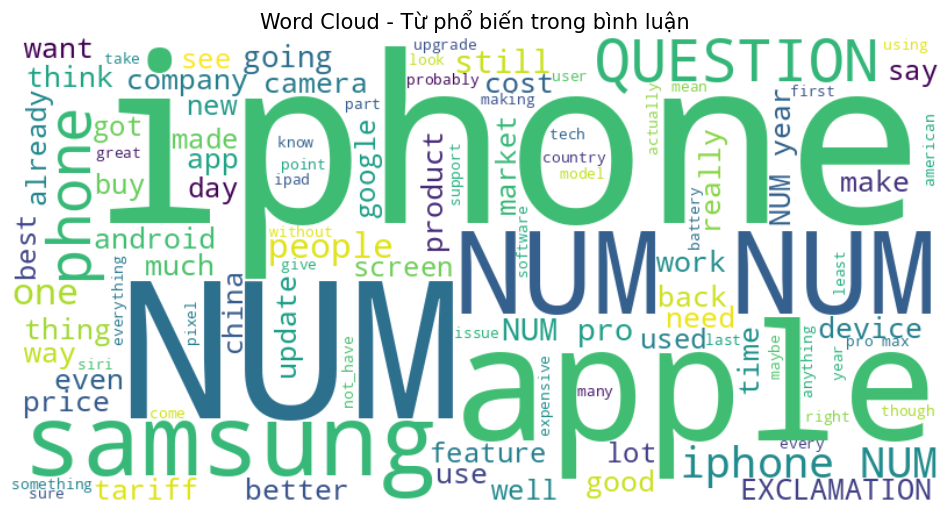

In [202]:
# ## 6. Ph√¢n t√≠ch c√°c t·ª´ ph·ªï bi·∫øn
print("\n== Ph√¢n t√≠ch c√°c t·ª´ ph·ªï bi·∫øn ==")

# T√≠nh t·∫ßn su·∫•t xu·∫•t hi·ªán c·ªßa c√°c t·ª´
all_words = ' '.join(df['processed_comment']).split()
word_counts = Counter(all_words)

# Hi·ªÉn th·ªã 20 t·ª´ ph·ªï bi·∫øn nh·∫•t
print("20 t·ª´ ph·ªï bi·∫øn nh·∫•t:")
for word, count in word_counts.most_common(20):
    print(f"{word}: {count}")

# V·∫Ω word cloud
print("\nT·∫°o word cloud...")
plt.figure(figsize=(12, 8))
wordcloud = WordCloud(width=800, height=400, background_color='white',
                     max_words=100, contour_width=3, contour_color='steelblue')
wordcloud.generate(' '.join(all_words))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - T·ª´ ph·ªï bi·∫øn trong b√¨nh lu·∫≠n', fontsize=15)
plt.show()

 Bi·ªÉu ƒë·ªì cho th·∫•y ng∆∞·ªùi d√πng ch·ªß y·∫øu th·∫£o lu·∫≠n v·ªÅ c√°c s·∫£n ph·∫©m nh∆∞ iPhone v√† Samsung, c√°c t√≠nh nƒÉng c·ªßa ƒëi·ªán tho·∫°i, gi√° c·∫£ v√† c√°c v·∫•n ƒë·ªÅ li√™n quan ƒë·∫øn pin.

### 2.7. B·ªï sung c√°c ƒë·∫∑c tr∆∞ng c·∫£m x√∫c m·ªõi

In [203]:
# ## 7.Th√™m c√°c ƒë·∫∑c tr∆∞ng c·∫£m x√∫c m·ªõi
print("\n== Th√™m ƒë·∫∑c tr∆∞ng c·∫£m x√∫c ==")

# ƒê·∫øm s·ªë l∆∞·ª£ng d·∫•u ch·∫•m than v√† d·∫•u h·ªèi trong vƒÉn b·∫£n g·ªëc
df['exclamation_count'] = df['comment_body'].apply(lambda x: str(x).count('!') if isinstance(x, str) else 0)
df['question_count'] = df['comment_body'].apply(lambda x: str(x).count('?') if isinstance(x, str) else 0)

# ƒê·∫øm s·ªë l∆∞·ª£ng emoji
df['emoji_count'] = df['emojis_list'].apply(len)

# ƒê·∫øm s·ªë t·ª´ in hoa (c√≥ th·ªÉ bi·ªÉu th·ªã nh·∫•n m·∫°nh)
df['uppercase_word_count'] = df['comment_body'].apply(
    lambda x: len([w for w in str(x).split() if w.isupper() and len(w) > 1]) if isinstance(x, str) else 0
)

# Hi·ªÉn th·ªã th·ªëng k√™ v·ªÅ c√°c ƒë·∫∑c tr∆∞ng m·ªõi
print("\nTh·ªëng k√™ v·ªÅ c√°c ƒë·∫∑c tr∆∞ng c·∫£m x√∫c m·ªõi:")
print(df[['exclamation_count', 'question_count', 'emoji_count', 'uppercase_word_count']].describe())


== Th√™m ƒë·∫∑c tr∆∞ng c·∫£m x√∫c ==

Th·ªëng k√™ v·ªÅ c√°c ƒë·∫∑c tr∆∞ng c·∫£m x√∫c m·ªõi:
       exclamation_count  question_count  emoji_count  uppercase_word_count
count        2536.000000     2536.000000  2536.000000           2536.000000
mean            0.107256        0.308754     0.039826              1.032334
std             0.634581        0.730633     0.301853              3.114726
min             0.000000        0.000000     0.000000              0.000000
25%             0.000000        0.000000     0.000000              0.000000
50%             0.000000        0.000000     0.000000              0.000000
75%             0.000000        0.000000     0.000000              1.000000
max            15.000000       12.000000     6.000000             87.000000


### 2.8. L∆∞u d·ªØ li·ªáu ƒë√£ ti·ªÅn x·ª≠ l√Ω

In [204]:
# Chu·∫©n b·ªã c√°c c·ªôt ƒë·ªÉ l∆∞u
columns_to_save = ['brand', 'subreddit', 'post_id', 'post_title', 'comment_id',
                    'comment_body', 'comment_score', 'comment_time', 'comment_author',
                    'processed_comment', 'processed_word_count',
                    'exclamation_count', 'question_count', 'emoji_count', 'uppercase_word_count']

output_df = df[columns_to_save].copy()
# L∆∞u v·ªõi t√™n kh√°c ƒë·ªÉ ph√¢n bi·ªát
output_df.to_csv('/content/drive/MyDrive/BTL_Data_Mining/Dataset/processed/preprocessed_reddit_comments_enhanced.csv', index=False)
print("\nEnhanced preprocessed data saved to 'preprocessed_reddit_comments_enhanced.csv'")


Enhanced preprocessed data saved to 'preprocessed_reddit_comments_enhanced.csv'


## 3. G√°n nh√£n d·ªØ li·ªáu

In [205]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

# N·∫øu ch∆∞a t·∫£i b·ªô t·ª´ ƒëi·ªÉn c·ªßa VADER th√¨ ch·∫°y l·ªánh n√†y:
nltk.download('vader_lexicon')

# Kh·ªüi t·∫°o ƒë·ªëi t∆∞·ª£ng ph√¢n t√≠ch c·∫£m x√∫c
sid = SentimentIntensityAnalyzer()

# H√†m t√≠nh ƒëi·ªÉm c·∫£m x√∫c (compound score)
def get_sentiment_score(text):
    if not isinstance(text, str):
        return 0
    score = sid.polarity_scores(text)['compound']
    return score

# H√†m g√°n nh√£n c·∫£m x√∫c t·ª´ ƒëi·ªÉm s·ªë
def assign_sentiment_label(score):
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# √Åp d·ª•ng l√™n c·ªôt 'processed_comment'
df['sentiment_score'] = df['processed_comment'].apply(get_sentiment_score)
df['sentiment'] = df['sentiment_score'].apply(assign_sentiment_label)

# In th·ª≠ k·∫øt qu·∫£
print("\nüìå M·ªôt s·ªë v√≠ d·ª• g√°n nh√£n c·∫£m x√∫c b·∫±ng VADER:\n")
for i, row in df[['processed_comment', 'sentiment_score', 'sentiment']].head(5).iterrows():
    print(f"üîπ B√¨nh lu·∫≠n {i+1}:")
    print("  N·ªôi dung:", row['processed_comment'][:150], "...")
    print("  ‚Üí ƒêi·ªÉm c·∫£m x√∫c:", row['sentiment_score'])
    print("  ‚Üí Nh√£n c·∫£m x√∫c:", row['sentiment'])
    print()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!



üìå M·ªôt s·ªë v√≠ d·ª• g√°n nh√£n c·∫£m x√∫c b·∫±ng VADER:

üîπ B√¨nh lu·∫≠n 1:
  N·ªôi dung: anyone else noticed suggests everyone contact without way control access contact <QUESTION> rarely notice behavior recently checked iphone setting not ...
  ‚Üí ƒêi·ªÉm c·∫£m x√∫c: -0.296
  ‚Üí Nh√£n c·∫£m x√∫c: negative

üîπ B√¨nh lu·∫≠n 2:
  N·ªôi dung: anyone not_rich enough buy iphone get pay extra tax maga <EXCLAMATION> ...
  ‚Üí ƒêi·ªÉm c·∫£m x√∫c: -0.1027
  ‚Üí Nh√£n c·∫£m x√∫c: negative

üîπ B√¨nh lu·∫≠n 3:
  N·ªôi dung: reddit total shit since whatever feed used feed general interest sub choose home feed not_even show post sub joined instead show stuff sub recently vi ...
  ‚Üí ƒêi·ªÉm c·∫£m x√∫c: -0.4404
  ‚Üí Nh√£n c·∫£m x√∫c: negative

üîπ B√¨nh lu·∫≠n 4:
  N·ªôi dung: mac likely iphone photo storage icloud likely way user would built use window work fine one drive <NUM> never_use ...
  ‚Üí ƒêi·ªÉm c·∫£m x√∫c: 0.2023
  ‚Üí Nh√£n c·∫£m x√∫c: positive

üîπ B√¨nh lu·∫≠n 5:
  N

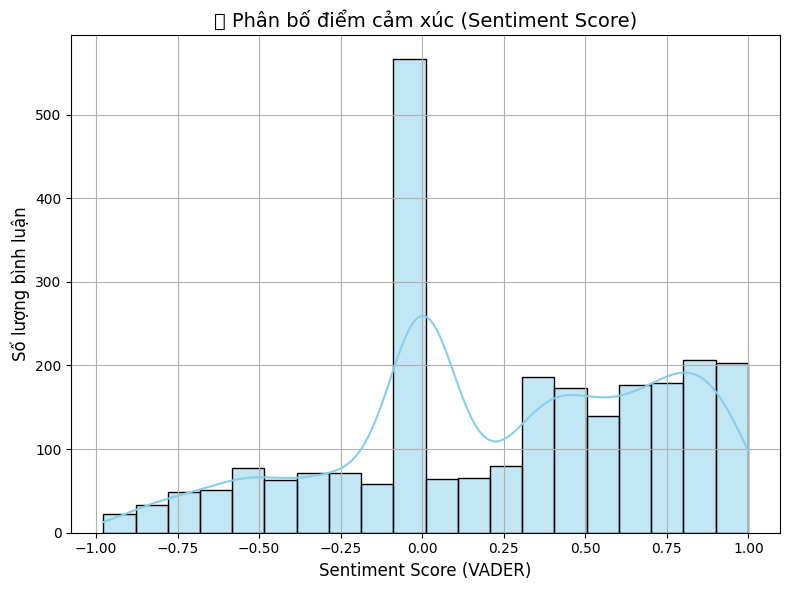

In [206]:
# Visualize sentiment distribution using a histogram
plt.figure(figsize=(8, 6))
sns.histplot(df['sentiment_score'], bins=20, kde=True, color='skyblue')

plt.title('üìà Ph√¢n b·ªë ƒëi·ªÉm c·∫£m x√∫c (Sentiment Score)', fontsize=14)
plt.xlabel('Sentiment Score (VADER)', fontsize=12)
plt.ylabel('S·ªë l∆∞·ª£ng b√¨nh lu·∫≠n', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

 Bi·ªÉu ƒë·ªì n√†y cho th·∫•y ph·∫ßn l·ªõn c√°c b√¨nh lu·∫≠n trong b·ªô d·ªØ li·ªáu c√≥ c·∫£m x√∫c trung t√≠nh v·ªõi √≠t b√¨nh lu·∫≠n r√µ r√†ng t√≠ch c·ª±c ho·∫∑c ti√™u c·ª±c. ƒêi·ªÅu n√†y c√≥ th·ªÉ ph·∫£n √°nh m·ªôt s·ª± ph√¢n b·ªë c·∫£m x√∫c c√¢n b·∫±ng, n∆°i ng∆∞·ªùi d√πng chia s·∫ª quan ƒëi·ªÉm m√† kh√¥ng c√≥ c·∫£m x√∫c qu√° m·∫°nh m·∫Ω.


In [207]:
df.sentiment.value_counts()

sentiment
positive    1457
neutral      558
negative     521
Name: count, dtype: int64

In [208]:
# L∆∞u d·ªØ li·ªáu ƒë√£ g√°n nh√£n ra file CSV m·ªõi
df.to_csv('/content/drive/MyDrive/BTL_Data_Mining/Dataset/processed/reddit_comments_with_sentiment.csv', index=False, encoding='utf-8-sig')
print("‚úÖ ƒê√£ l∆∞u d·ªØ li·ªáu ƒë√£ g√°n nh√£n v√†o file reddit_comments_with_sentiment.csv")

‚úÖ ƒê√£ l∆∞u d·ªØ li·ªáu ƒë√£ g√°n nh√£n v√†o file reddit_comments_with_sentiment.csv


## 4. EDA

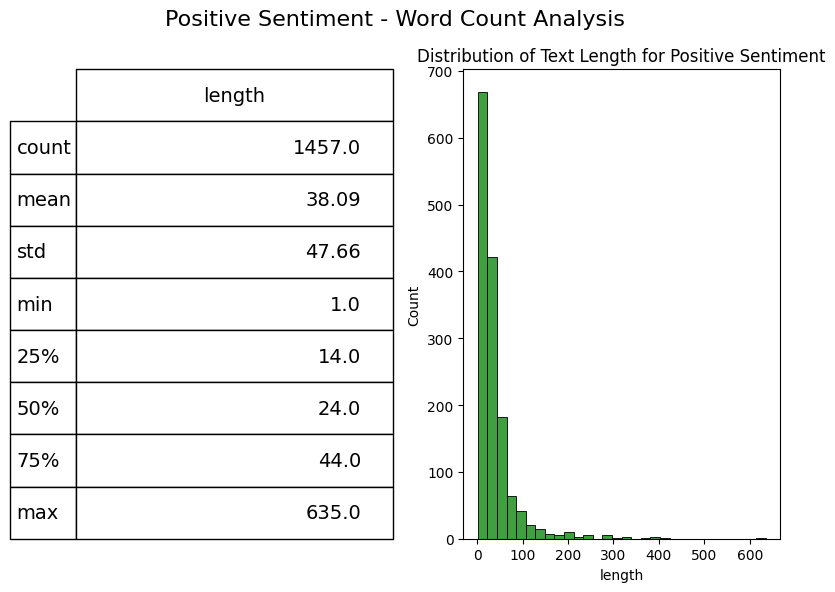

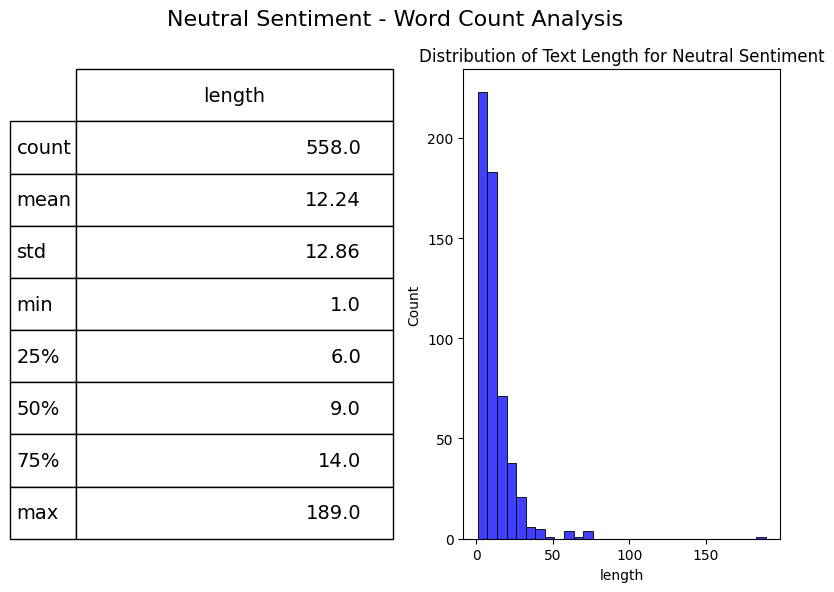

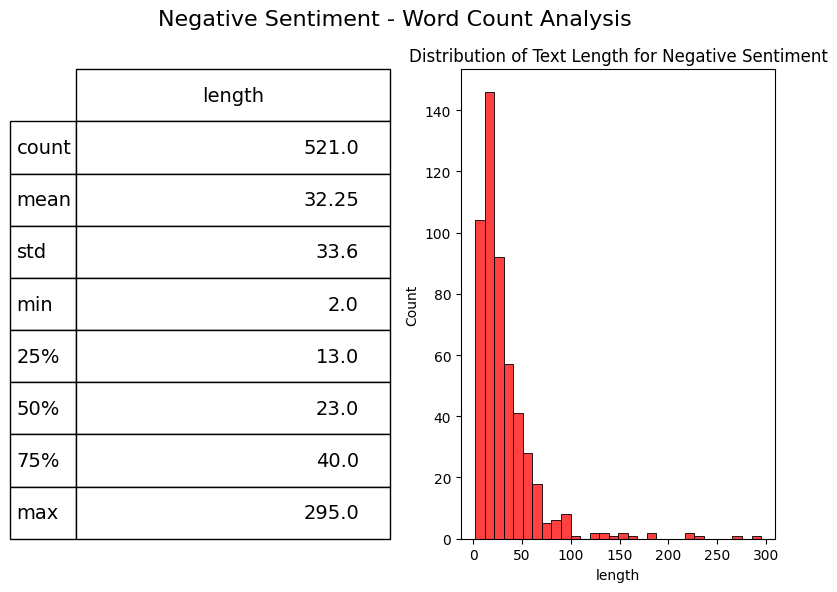

In [209]:
import matplotlib.pyplot as plt
import seaborn as sns

# T√≠nh ƒë·ªô d√†i (s·ªë t·ª´) c·ªßa b√¨nh lu·∫≠n ƒë√£ x·ª≠ l√Ω
df['length'] = df['processed_comment'].str.split().apply(len)

# Thi·∫øt l·∫≠p m√†u v√† ti√™u ƒë·ªÅ cho t·ª´ng nh√≥m c·∫£m x√∫c
sentiment_groups = {
    'positive': {'color': 'green', 'title': 'Positive Sentiment'},
    'neutral': {'color': 'blue', 'title': 'Neutral Sentiment'},
    'negative': {'color': 'red', 'title': 'Negative Sentiment'}
}

# Duy·ªát qua t·ª´ng nh√≥m c·∫£m x√∫c ƒë·ªÉ v·∫Ω
for sentiment, config in sentiment_groups.items():
    fig = plt.figure(figsize=(8, 6))

    # L·ªçc d·ªØ li·ªáu theo nh√£n
    sentiment_data = df[df['sentiment'] == sentiment]
    desc = sentiment_data['length'].describe().round(2).to_frame()

    # B·∫£ng m√¥ t·∫£
    ax1 = fig.add_subplot(121)
    ax1.axis('off')
    table = ax1.table(cellText=desc.values,
                      rowLabels=desc.index,
                      colLabels=desc.columns,
                      bbox=[0, 0, 1, 1])
    table.set_fontsize(14)

    # Bi·ªÉu ƒë·ªì ph√¢n b·ªë ƒë·ªô d√†i
    ax2 = fig.add_subplot(122)
    sns.histplot(sentiment_data['length'], ax=ax2, color=config['color'], bins=30)
    ax2.set_title(f'Distribution of Text Length for {config["title"]}')

    plt.suptitle(f'{config["title"]} - Word Count Analysis', fontsize=16)
    plt.tight_layout()
    plt.show()




*   Bi·ªÉu ƒë·ªì v·ªÅ `Positive` cho th·∫•y ph·∫ßn l·ªõn c√°c b√¨nh lu·∫≠n t√≠ch c·ª±c trong d·ªØ li·ªáu c√≥ ƒë·ªô d√†i ng·∫Øn, nh∆∞ng c√≥ m·ªôt s·ªë √≠t b√¨nh lu·∫≠n r·∫•t d√†i. ƒêi·ªÅu n√†y c√≥ th·ªÉ ph·∫£n √°nh xu h∆∞·ªõng ng∆∞·ªùi d√πng ƒë∆∞a ra nh·∫≠n x√©t ng·∫Øn g·ªçn v√† t√≠ch c·ª±c v·ªÅ s·∫£n ph·∫©m ho·∫∑c ch·ªß ƒë·ªÅ, m·∫∑c d√π c≈©ng c√≥ nh·ªØng b√¨nh lu·∫≠n d√†i ƒë·ªÉ m√¥ t·∫£ chi ti·∫øt c·∫£m x√∫c t√≠ch c·ª±c c·ªßa h·ªç

*   Bi·ªÉu ƒë·ªì v·ªÅ `Neutral` cho th·∫•y ph·∫ßn l·ªõn c√°c b√¨nh lu·∫≠n trung l·∫≠p trong d·ªØ li·ªáu c√≥ ƒë·ªô d√†i ng·∫Øn, v·ªõi m·ªôt s·ªë √≠t b√¨nh lu·∫≠n d√†i. ƒêi·ªÅu n√†y ph·∫£n √°nh xu h∆∞·ªõng ng∆∞·ªùi d√πng chia s·∫ª quan ƒëi·ªÉm trung l·∫≠p m·ªôt c√°ch nhanh ch√≥ng v√† ng·∫Øn g·ªçn

*   Bi·ªÉu ƒë·ªì v·ªÅ `Negative` cho th·∫•y ph·∫ßn l·ªõn c√°c b√¨nh lu·∫≠n ti√™u c·ª±c c√≥ ƒë·ªô d√†i ng·∫Øn, nh∆∞ng v·∫´n t·ªìn t·∫°i m·ªôt s·ªë b√¨nh lu·∫≠n d√†i h∆°n. ƒêi·ªÅu n√†y c√≥ th·ªÉ ph·∫£n √°nh r·∫±ng ng∆∞·ªùi d√πng th∆∞·ªùng chia s·∫ª c·∫£m x√∫c ti√™u c·ª±c ng·∫Øn g·ªçn, m·∫∑c d√π c√≥ nh·ªØng b√¨nh lu·∫≠n d√†i khi c·∫ßn gi·∫£i th√≠ch chi ti·∫øt c·∫£m x√∫c c·ªßa h·ªç.







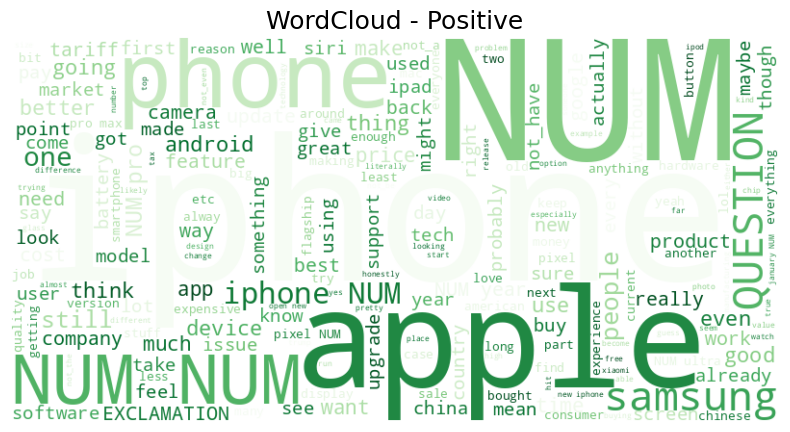

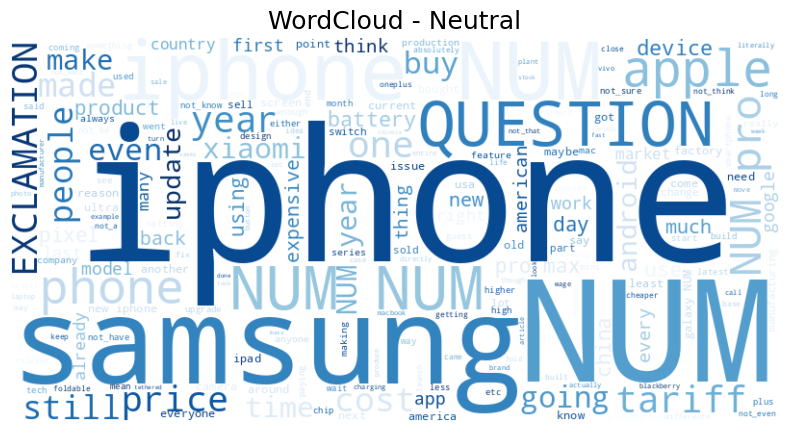

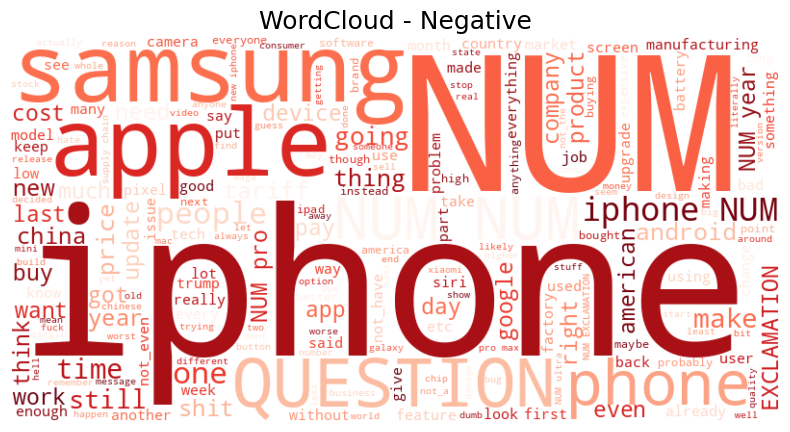

In [210]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Thi·∫øt l·∫≠p c·∫•u h√¨nh t·ª´ng nh√£n
sentiment_configs = {
    'positive': {'color': 'Greens', 'title': 'WordCloud - Positive'},
    'neutral':  {'color': 'Blues',  'title': 'WordCloud - Neutral'},
    'negative': {'color': 'Reds',   'title': 'WordCloud - Negative'}
}

# T·∫°o wordcloud cho t·ª´ng lo·∫°i nh√£n
for sentiment, config in sentiment_configs.items():
    # N·ªëi to√†n b·ªô vƒÉn b·∫£n c·ªßa nh√£n ƒë√≥ l·∫°i th√†nh 1 chu·ªói
    text = ' '.join(df[df['sentiment'] == sentiment]['processed_comment'])

    # T·∫°o WordCloud
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        colormap=config['color'],
        max_words=200
    ).generate(text)

    # Hi·ªÉn th·ªã WordCloud
    plt.figure(figsize=(8, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(config['title'], fontsize=18)
    plt.tight_layout()
    plt.show()




*   C·∫£m x√∫c t√≠ch c·ª±c: Ch·ªß y·∫øu li√™n quan ƒë·∫øn s·ª± h√†i l√≤ng v·ªõi c√°c s·∫£n ph·∫©m nh∆∞ iPhone v√† Apple.

*   C·∫£m x√∫c trung l·∫≠p: Ch·ªß y·∫øu l√† th·∫£o lu·∫≠n v√† so s√°nh gi·ªØa c√°c s·∫£n ph·∫©m, kh√¥ng c√≥ c·∫£m x√∫c r√µ r√†ng.

*   C·∫£m x√∫c ti√™u c·ª±c: Li√™n quan ƒë·∫øn s·ª± th·∫•t v·ªçng v√† ch·ªâ tr√≠ch c√°c s·∫£n ph·∫©m, ƒë·∫∑c bi·ªát l√† iPhone v√† Samsung.


In [211]:
import plotly.express as px

# V·∫Ω pie chart cho c·ªôt 'sentiment'
fig = px.pie(
    df,
    names='sentiment',
    title='üìä Ph√¢n b·ªë t·ª∑ l·ªá c·∫£m x√∫c trong d·ªØ li·ªáu Reddit',
    hole=0.3  # t·∫°o Donut chart n·∫øu mu·ªën, b·ªè n·∫øu b·∫°n th√≠ch Pie truy·ªÅn th·ªëng
)

# Hi·ªÉn th·ªã
fig.show()


Bi·ªÉu ƒë·ªì cho th·∫•y ph·∫ßn l·ªõn c√°c b√¨nh lu·∫≠n tr√™n Reddit c√≥ c·∫£m x√∫c t√≠ch c·ª±c, v·ªõi m·ªôt t·ª∑ l·ªá nh·ªè c·∫£m x√∫c ti√™u c·ª±c v√† trung l·∫≠p. ƒêi·ªÅu n√†y c√≥ th·ªÉ ph·∫£n √°nh xu h∆∞·ªõng chung c·ªßa ng∆∞·ªùi d√πng khi tham gia v√†o c√°c th·∫£o lu·∫≠n tr·ª±c tuy·∫øn v·ªÅ s·∫£n ph·∫©m ho·∫∑c ch·ªß ƒë·ªÅ c·ª• th·ªÉ.


## 5. Tr√≠ch xu·∫•t ƒë·∫∑c tr∆∞ng

In [212]:
def evaluate(X, y, name):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"== {name} ==")
    print(classification_report(y_test, y_pred, target_names=le.classes_))
    return model.score(X_test, y_test)

In [213]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# Gi·∫£ s·ª≠ df1 ƒë√£ c√≥ s·∫µn
le = LabelEncoder()
df1 = df.copy()
df1['label'] = le.fit_transform(df1['sentiment'])
y = df1['label']

# BoW
bow_vectorizer = CountVectorizer(max_features=3000)
X_bow = bow_vectorizer.fit_transform(df1['processed_comment'])

# TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=3000)
X_tfidf = tfidf_vectorizer.fit_transform(df1['processed_comment'])

# Handcrafted features
df1['length'] = df1['processed_comment'].str.split().apply(len)
df1['num_exclamation'] = df1['processed_comment'].str.count('<EXCLAMATION>')
df1['num_question'] = df1['processed_comment'].str.count('<QUESTION>')
df1['num_num'] = df1['processed_comment'].str.count('<NUM>')
X_handcrafted = df1[['length', 'num_exclamation', 'num_question', 'num_num']].values

# K·∫øt h·ª£p
X_tfidf_hand = np.hstack([X_tfidf.toarray(), X_handcrafted])
X_bow_hand = np.hstack([X_bow.toarray(), X_handcrafted])

In [214]:
print("Bag of Words Features:")
print(X_bow[:2])

Bag of Words Features:
<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 39 stored elements and shape (2, 3000)>
  Coords	Values
  (0, 117)	2
  (0, 728)	1
  (0, 1854)	1
  (0, 2603)	1
  (0, 787)	1
  (0, 515)	3
  (0, 2957)	1
  (0, 2911)	1
  (0, 522)	1
  (0, 10)	2
  (0, 2133)	2
  (0, 2152)	1
  (0, 1853)	1
  (0, 2183)	1
  (0, 408)	1
  (0, 1294)	1
  (0, 2402)	1
  (0, 1832)	1
  (0, 1347)	1
  (0, 1980)	1
  (0, 917)	1
  (0, 1385)	1
  (0, 1334)	1
  (0, 1573)	1
  (0, 2500)	1
  (0, 1201)	1
  (0, 919)	1
  (0, 500)	1
  (0, 36)	1
  (1, 117)	1
  (1, 1294)	1
  (1, 746)	1
  (1, 341)	1
  (1, 1044)	1
  (1, 1955)	1
  (1, 846)	1
  (1, 2652)	1
  (1, 1464)	1
  (1, 801)	1


In [215]:
print("TF-IDF Features:")
print(X_tfidf[:2])

TF-IDF Features:
<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 39 stored elements and shape (2, 3000)>
  Coords	Values
  (0, 117)	0.2541581822385708
  (0, 728)	0.12618932343764303
  (0, 1854)	0.16547292903310498
  (0, 2603)	0.18808778230306383
  (0, 787)	0.12067467368898013
  (0, 515)	0.5519202436084298
  (0, 2957)	0.11464776754471458
  (0, 2911)	0.10078735372453244
  (0, 522)	0.13953342710398073
  (0, 10)	0.29999449891286245
  (0, 2133)	0.13676744429929208
  (0, 2152)	0.1929540465149922
  (0, 1853)	0.16745091221321678
  (0, 2183)	0.14603583659915997
  (0, 408)	0.16958729680002552
  (0, 1294)	0.04098515470328727
  (0, 2402)	0.1381283364457657
  (0, 1832)	0.17445356101195392
  (0, 1347)	0.14026472103257442
  (0, 1980)	0.0663556158398943
  (0, 917)	0.12449411515465579
  (0, 1385)	0.13552231114353935
  (0, 1334)	0.11021085133652962
  (0, 1573)	0.17445356101195392
  (0, 2500)	0.10973422155126421
  (0, 1201)	0.14999724945643123
  (0, 919)	0.18040938706443832
  (0, 500)	0.160

In [216]:
print("Handcrafted Features (First 5 rows):")
print(df1[['length', 'num_exclamation', 'num_question', 'num_num']].head())

Handcrafted Features (First 5 rows):
   length  num_exclamation  num_question  num_num
0      39                0             2        0
1      11                1             0        0
2      69                0             0        1
3      19                0             0        1
4      32                0             0        0


In [217]:
print("Shape of TF-IDF + Handcrafted Features:", X_tfidf_hand.shape)
print(X_tfidf_hand[:10])

Shape of TF-IDF + Handcrafted Features: (2536, 3004)
[[0. 0. 0. ... 0. 2. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 3. 1.]]


In [218]:
print("Shape of BoW + Handcrafted Features:", X_bow_hand.shape)
print(X_bow_hand[:10])

Shape of BoW + Handcrafted Features: (2536, 3004)
[[0 0 0 ... 0 2 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 1]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 3 1]]


In [219]:
scores = {}
scores['BoW'] = evaluate(X_bow, y, "Bag-of-Words")
scores['TF-IDF'] = evaluate(X_tfidf, y, "TF-IDF")
scores['Handcrafted'] = evaluate(X_handcrafted, y, "Handcrafted Features")
scores['TF-IDF+Hand'] = evaluate(X_tfidf_hand, y, "TF-IDF + Handcrafted")
scores['BoW+Hand'] = evaluate(X_bow_hand, y, "BoW + Handcrafted")

best = max(scores, key=scores.get)
print("\n== K·∫øt lu·∫≠n ==")
print(f"ƒê·∫∑c tr∆∞ng ph√π h·ª£p nh·∫•t v·ªõi d·ªØ li·ªáu n√†y l√†: {best} (score: {scores[best]:.4f})")


== Bag-of-Words ==
              precision    recall  f1-score   support

    negative       0.69      0.44      0.54       122
     neutral       0.61      0.66      0.63       118
    positive       0.76      0.85      0.80       268

    accuracy                           0.71       508
   macro avg       0.69      0.65      0.66       508
weighted avg       0.71      0.71      0.70       508

== TF-IDF ==
              precision    recall  f1-score   support

    negative       0.86      0.15      0.25       122
     neutral       0.72      0.41      0.52       118
    positive       0.61      0.96      0.75       268

    accuracy                           0.64       508
   macro avg       0.73      0.51      0.51       508
weighted avg       0.70      0.64      0.58       508

== Handcrafted Features ==
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00       122
     neutral       0.61      0.47      0.53       118
    positive    

## 6. X√¢y d·ª±ng m√¥ h√¨nh

In [220]:
df['label'] = le.fit_transform(df['sentiment'])
y = df['label']

# BoW + Hand
bow_vectorizer = CountVectorizer(max_features=3000)
X_bow = bow_vectorizer.fit_transform(df['processed_comment'])
X_bow_hand = np.hstack([X_bow.toarray(), X_handcrafted])
X_train, X_test, y_train, y_test = train_test_split(X_bow_hand, y, test_size=0.2, random_state=42)

### 6.1. S.d th∆∞ vi·ªán

In [221]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Gi·∫£ s·ª≠ X_bow_hand, y, le ƒë√£ c√≥ t·ª´ c√°c b∆∞·ªõc tr∆∞·ªõc
X_train, X_test, y_train, y_test = train_test_split(X_bow_hand, y, test_size=0.2, random_state=42)

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": MultinomialNB()
}

best_score = 0
best_model = None
best_name = ""

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    print(f"\n== {name} ==")
    print(classification_report(y_test, y_pred, target_names=le.classes_))
    if score > best_score:
        best_score = score
        best_model = model
        best_name = name

print(f"\n== Best Model: {best_name} (accuracy: {best_score:.4f}) ==")



== Logistic Regression ==
              precision    recall  f1-score   support

    negative       0.72      0.48      0.57       122
     neutral       0.67      0.71      0.69       118
    positive       0.76      0.86      0.81       268

    accuracy                           0.73       508
   macro avg       0.72      0.68      0.69       508
weighted avg       0.73      0.73      0.72       508


== SVM ==
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00       122
     neutral       0.61      0.47      0.53       118
    positive       0.59      0.91      0.71       268

    accuracy                           0.59       508
   macro avg       0.40      0.46      0.41       508
weighted avg       0.45      0.59      0.50       508


== Random Forest ==
              precision    recall  f1-score   support

    negative       0.92      0.09      0.16       122
     neutral       0.62      0.56      0.59       118
    positive    

### 6.2. Support Vector Machine (SVM)

In [235]:
class SVM_Manual_Fast:
    def __init__(self, kernel='linear', C=1.0, gamma=0.1, degree=3, max_iter=100, tol=1e-3, class_weight=None):
        self.kernel = kernel
        self.C = C
        self.gamma = gamma
        self.degree = degree
        self.max_iter = max_iter
        self.tol = tol
        self.classes = None
        self.models = []
        self.class_weight = class_weight  # Th√™m class_weight

    def _kernel_function(self, x1, x2):
        if self.kernel == 'linear':
            return linear_kernel(x1, x2)
        elif self.kernel == 'rbf':
            return rbf_kernel(x1, x2, self.gamma)
        elif self.kernel == 'poly':
            return polynomial_kernel(x1, x2, self.degree)
        else:
            raise ValueError(f"Kernel kh√¥ng h·ª£p l·ªá: {self.kernel}")

    def _compute_kernel_matrix(self, X):
        n_samples = X.shape[0]
        K = np.zeros((n_samples, n_samples))
        for i in range(n_samples):
            for j in range(i, n_samples):
                K[i, j] = K[j, i] = self._kernel_function(X[i], X[j])
        return K

    def fit(self, X, y):
        print(f"Hu·∫•n luy·ªán SVM v·ªõi kernel={self.kernel}, C={self.C}, gamma={self.gamma}")

        # Multi-class SVM v·ªõi One-vs-Rest approach
        self.classes = np.unique(y)
        n_classes = len(self.classes)

        # T√≠nh class weights n·∫øu kh√¥ng ƒë∆∞·ª£c cung c·∫•p
        if self.class_weight is None:
            # T√≠nh class_weight t·ª± ƒë·ªông d·ª±a tr√™n s·ªë l∆∞·ª£ng m·∫´u (balanced)
            class_counts = np.array([np.sum(y == c) for c in self.classes])
            total_samples = len(y)
            self.class_weight = total_samples / (n_classes * class_counts)

        print("Class weights:", {c: w for c, w in zip(self.classes, self.class_weight)})

        # T√≠nh to√°n kernel matrix m·ªôt l·∫ßn ƒë·ªÉ tƒÉng t·ªëc (t·ªëi ∆∞u b·ªô nh·ªõ)
        print("T√≠nh kernel matrix...")
        start_time = time.time()
        K = self._compute_kernel_matrix(X)
        print(f"T√≠nh kernel matrix m·∫•t {time.time() - start_time:.2f}s")

        for i, c in enumerate(self.classes):
            print(f"  Hu·∫•n luy·ªán l·ªõp {c} ({i+1}/{n_classes})")
            # Chuy·ªÉn th√†nh b√†i to√°n nh·ªã ph√¢n
            binary_y = np.where(y == c, 1, -1)

            # √Åp d·ª•ng class weights cho b√†i to√°n nh·ªã ph√¢n
            sample_weights = np.ones(len(y))
            sample_weights[y == c] = self.class_weight[i]  # Weight cho m·∫´u positive
            sample_weights[y != c] = np.mean([self.class_weight[j] for j in range(n_classes) if j != i])  # Weight trung b√¨nh cho m·∫´u negative

            # Kh·ªüi t·∫°o alpha v√† b
            n_samples = X.shape[0]
            alphas = np.zeros(n_samples)
            b = 0

            # SMO ƒë∆°n gi·∫£n h√≥a v·ªõi d·ª´ng s·ªõm
            it = 0
            num_alpha_changes = 0
            examine_all = True

            while (it < self.max_iter) and ((num_alpha_changes > 0) or examine_all):
                num_alpha_changes = 0

                # X√°c ƒë·ªãnh danh s√°ch m·∫´u ƒë·ªÉ xem x√©t
                if examine_all:
                    # Xem x√©t t·∫•t c·∫£ ƒëi·ªÉm
                    range_i = np.random.permutation(n_samples)
                else:
                    # Ch·ªâ xem x√©t c√°c ƒëi·ªÉm c√≥ 0 < alpha < C (non-bound support vectors)
                    non_bound_idx = np.where((alphas > 0) & (alphas < self.C * sample_weights))[0]
                    if len(non_bound_idx) > 0:
                        range_i = non_bound_idx
                    else:
                        range_i = np.random.permutation(n_samples)

                # Ch·ªâ xem x√©t m·ªôt t·∫≠p con m·∫´u trong m·ªói v√≤ng l·∫∑p ƒë·ªÉ tƒÉng t·ªëc
                num_samples_to_examine = min(200, len(range_i))  # TƒÉng l√™n 200 m·∫´u/v√≤ng l·∫∑p
                range_i = range_i[:num_samples_to_examine]

                # ƒê·ªãnh nghƒ©a non_bound_idx tr∆∞·ªõc khi s·ª≠ d·ª•ng trong v√≤ng l·∫∑p
                non_bound_idx = np.where((alphas > 0) & (alphas < self.C * sample_weights))[0]

                for j in range_i:
                    # T√≠nh l·ªói
                    fj = np.sum(alphas * binary_y * K[j]) + b
                    Ej = fj - binary_y[j]

                    # Ki·ªÉm tra n·∫øu c√≥ th·ªÉ t·ªëi ∆∞u alpha
                    if ((binary_y[j] * Ej < -self.tol and alphas[j] < self.C * sample_weights[j]) or
                        (binary_y[j] * Ej > self.tol and alphas[j] > 0)):

                        # Kh·ªüi t·∫°o gi√° tr·ªã k m·∫∑c ƒë·ªãnh
                        k = j

                        # Ch·ªçn second sample th√¥ng minh h∆°n
                        if len(non_bound_idx) > 1:
                            # Ch·ªçn k ƒë·ªÉ max |E_j - E_k| n·∫øu c√≥ > 1 non-bound SVs
                            max_error_diff = 0
                            Ek = 0

                            for idx in non_bound_idx:
                                if idx != j:
                                    fk_tmp = np.sum(alphas * binary_y * K[idx]) + b
                                    Ek_tmp = fk_tmp - binary_y[idx]
                                    error_diff = abs(Ej - Ek_tmp)

                                    if error_diff > max_error_diff:
                                        max_error_diff = error_diff
                                        k = idx
                                        Ek = Ek_tmp

                            # N·∫øu kh√¥ng t√¨m ƒë∆∞·ª£c k ph√π h·ª£p, ch·ªçn ng·∫´u nhi√™n
                            if k == j:
                                while k == j and len(range_i) > 1:
                                    k = range_i[np.random.randint(0, len(range_i))]
                                fk = np.sum(alphas * binary_y * K[k]) + b
                                Ek = fk - binary_y[k]
                        else:
                            # Ch·ªçn k ng·∫´u nhi√™n n·∫øu kh√¥ng c√≥ non-bound SVs
                            while k == j and len(range_i) > 1:
                                k = range_i[np.random.randint(0, len(range_i))]
                            fk = np.sum(alphas * binary_y * K[k]) + b
                            Ek = fk - binary_y[k]

                        # L∆∞u alpha c≈©
                        alpha_j_old = alphas[j]
                        alpha_k_old = alphas[k]

                        # T√≠nh gi·ªõi h·∫°n
                        if binary_y[j] != binary_y[k]:
                            L = max(0, alphas[k] - alphas[j])
                            H = min(self.C * sample_weights[k], self.C * sample_weights[j] + alphas[k] - alphas[j])
                        else:
                            L = max(0, alphas[j] + alphas[k] - self.C * sample_weights[k])
                            H = min(self.C * sample_weights[j], alphas[j] + alphas[k])

                        if L == H:
                            continue

                        # T√≠nh eta
                        eta = 2.0 * K[j, k] - K[j, j] - K[k, k]
                        if eta >= 0:
                            continue

                        # C·∫≠p nh·∫≠t alpha k
                        alphas[k] = alpha_k_old - binary_y[k] * (Ej - Ek) / eta
                        alphas[k] = min(H, alphas[k])
                        alphas[k] = max(L, alphas[k])

                        if abs(alphas[k] - alpha_k_old) < self.tol:
                            continue

                        # C·∫≠p nh·∫≠t alpha j
                        alphas[j] = alpha_j_old + binary_y[j] * binary_y[k] * (alpha_k_old - alphas[k])

                        # C·∫≠p nh·∫≠t b
                        b1 = b - Ej - binary_y[j] * (alphas[j] - alpha_j_old) * K[j, j] - binary_y[k] * (alphas[k] - alpha_k_old) * K[j, k]
                        b2 = b - Ek - binary_y[j] * (alphas[j] - alpha_j_old) * K[j, k] - binary_y[k] * (alphas[k] - alpha_k_old) * K[k, k]

                        if 0 < alphas[j] < self.C * sample_weights[j]:
                            b = b1
                        elif 0 < alphas[k] < self.C * sample_weights[k]:
                            b = b2
                        else:
                            b = (b1 + b2) / 2.0

                        num_alpha_changes += 1

                # Ki·ªÉm tra ti·∫øn ƒë·ªô
                if it % 5 == 0:
                    n_sv = np.sum((alphas > self.tol) & (alphas < self.C * sample_weights))
                    n_bound = np.sum(alphas >= self.C * sample_weights - self.tol)
                    print(f"    L·∫∑p l·∫°i {it}: {n_sv} support vectors, {n_bound} bound points, {num_alpha_changes} thay ƒë·ªïi")

                # Chuy·ªÉn ƒë·ªïi gi·ªØa examine_all v√† non_bound only
                if examine_all:
                    examine_all = False
                elif num_alpha_changes == 0:
                    examine_all = True

                it += 1

                # D·ª´ng s·ªõm n·∫øu ƒë√£ l·∫∑p ƒë·ªß v√† kh√¥ng c√≥ c·∫£i thi·ªán
                if it >= 20 and num_alpha_changes == 0:
                    print("    D·ª´ng s·ªõm v√¨ ƒë√£ h·ªôi t·ª•")
                    break

            # T√¨m support vectors
            sv_indices = np.where(alphas > self.tol)[0]
            support_vectors = X[sv_indices]
            support_vector_labels = binary_y[sv_indices]
            support_vector_alphas = alphas[sv_indices]

            print(f"    S·ªë l∆∞·ª£ng support vectors: {len(sv_indices)}")

            # L∆∞u model cho l·ªõp n√†y
            self.models.append({
                'support_vectors': support_vectors,
                'support_vector_labels': support_vector_labels,
                'alphas': support_vector_alphas,
                'b': b,
                'class': c
            })

        return self

    def predict(self, X):
        n_samples = X.shape[0]
        n_classes = len(self.classes)

        # Ma tr·∫≠n ƒë·ªÉ l∆∞u gi√° tr·ªã quy·∫øt ƒë·ªãnh cho m·ªói l·ªõp
        decision_values = np.zeros((n_samples, n_classes))

        # T√≠nh gi√° tr·ªã quy·∫øt ƒë·ªãnh cho m·ªói l·ªõp
        for i, model in enumerate(self.models):
            sv = model['support_vectors']
            sv_labels = model['support_vector_labels']
            alphas = model['alphas']
            b = model['b']

            for j in range(n_samples):
                decision_values[j, i] = np.sum([
                    alphas[k] * sv_labels[k] * self._kernel_function(X[j], sv[k])
                    for k in range(len(sv))
                ]) + b

        # Tr·∫£ v·ªÅ l·ªõp c√≥ gi√° tr·ªã quy·∫øt ƒë·ªãnh cao nh·∫•t
        return self.classes[np.argmax(decision_values, axis=1)]


In [236]:
# Chu·∫©n h√≥a d·ªØ li·ªáu - quan tr·ªçng cho SVM
def normalize_data(X):
    X_norm = X.copy()
    for i in range(X.shape[1]):
        feature_max = np.max(np.abs(X[:, i]))
        if feature_max > 0:
            X_norm[:, i] = X[:, i] / feature_max
    return X_norm

# ƒê·ªãnh nghƒ©a h·∫°t nh√¢n (kernel) cho SVM
def linear_kernel(x1, x2):
    return np.dot(x1, x2)

def rbf_kernel(x1, x2, gamma):
    return np.exp(-gamma * np.linalg.norm(x1 - x2)**2)

def polynomial_kernel(x1, x2, degree=3):
    return (np.dot(x1, x2) + 1) ** degree

In [237]:
# H√†m t√¨m tham s·ªë t·ªëi ∆∞u - phi√™n b·∫£n nhanh v√† c√¢n b·∫±ng h∆°n
def find_best_parameters_fast(X_train, y_train, X_val, y_val):
    best_acc = 0
    best_params = {'kernel': 'linear', 'C': 1.0, 'gamma': 0.1}  # M·∫∑c ƒë·ªãnh

    # Th·ª≠ nhi·ªÅu tham s·ªë h∆°n, t·∫≠p trung v√†o rbf kernel
    param_grid = [
        {'kernel': 'linear', 'C': 1.0, 'gamma': 0.1},
        {'kernel': 'rbf', 'C': 1.0, 'gamma': 0.1},
        {'kernel': 'rbf', 'C': 10.0, 'gamma': 0.01},
        {'kernel': 'rbf', 'C': 100.0, 'gamma': 0.001},  # C l·ªõn v·ªõi gamma nh·ªè th∆∞·ªùng t·ªët v·ªõi d·ªØ li·ªáu c√≥ nhi·ªÅu chi·ªÅu
        {'kernel': 'rbf', 'C': 10.0, 'gamma': 0.1}
    ]

    # Th·ª≠ v·ªõi t·∫≠p d·ªØ li·ªáu l·ªõn h∆°n
    subset_size = min(800, len(X_train))  # TƒÉng t·ª´ 500 l√™n 800
    X_train_subset = X_train[:subset_size]
    y_train_subset = y_train[:subset_size]

    val_subset_size = min(300, len(X_val))  # TƒÉng t·ª´ 200 l√™n 300
    X_val_subset = X_val[:val_subset_size]
    y_val_subset = y_val[:val_subset_size]

    # T√≠nh class weights d·ª±a tr√™n t·∫ßn su·∫•t xu·∫•t hi·ªán c·ªßa m·ªói l·ªõp (balanced)
    classes = np.unique(y_train_subset)
    class_counts = np.array([np.sum(y_train_subset == c) for c in classes])
    n_samples = len(y_train_subset)
    class_weight = n_samples / (len(classes) * class_counts)

    for params in param_grid:
        print(f"\nTh·ª≠ tham s·ªë: {params}")
        start_time = time.time()

        # S·ª≠ d·ª•ng class_weight ƒë·ªÉ c√¢n b·∫±ng
        svm = SVM_Manual_Fast(
            kernel=params['kernel'],
            C=params['C'],
            gamma=params['gamma'],
            max_iter=30,  # Gi·∫£m s·ªë l·∫ßn l·∫∑p xu·ªëng 30
            class_weight=class_weight  # Th√™m class_weight
        )

        svm.fit(X_train_subset, y_train_subset)
        y_pred = svm.predict(X_val_subset)

        # T√≠nh c√°c ch·ªâ s·ªë ƒë√°nh gi√°
        acc = accuracy_score(y_val_subset, y_pred)
        cm = confusion_matrix(y_val_subset, y_pred)

        # T√≠nh F1 score cho t·ª´ng l·ªõp
        report = classification_report(y_val_subset, y_pred, output_dict=True)
        f1_scores = [report[str(c)]['f1-score'] for c in classes]
        avg_f1 = np.mean(f1_scores)

        elapsed = time.time() - start_time
        print(f"Accuracy: {acc:.4f}, Avg F1: {avg_f1:.4f}, Th·ªùi gian: {elapsed:.2f}s")
        print("Confusion Matrix:")
        print(cm)

        # S·ª≠ d·ª•ng c·∫£ accuracy v√† F1 score ƒë·ªÉ ƒë√°nh gi√°
        combined_score = 0.5 * acc + 0.5 * avg_f1
        if combined_score > best_acc:  # Thay ƒë·ªïi ti√™u ch√≠ ƒë√°nh gi√°
            best_acc = combined_score
            best_params = params.copy()

    print(f"\nTham s·ªë t·ªët nh·∫•t: {best_params}, Combined score: {best_acc:.4f}")
    return best_params

In [238]:
print(f"D·ªØ li·ªáu ƒë√£ t·∫£i: X_train: {X_train.shape}, y_train: {y_train.shape}, X_test: {X_test.shape}")

# ƒê·∫£m b·∫£o d·ªØ li·ªáu ƒë·∫ßu v√†o l√† ndarray, kh√¥ng ph·∫£i pandas Series
if isinstance(y_train, pd.Series):
    print("Chuy·ªÉn ƒë·ªïi y_train t·ª´ pandas Series sang numpy array")
    y_train = y_train.to_numpy()
if isinstance(X_train, pd.DataFrame):
    print("Chuy·ªÉn ƒë·ªïi X_train t·ª´ pandas DataFrame sang numpy array")
    X_train = X_train.to_numpy()
if isinstance(X_test, pd.DataFrame):
    print("Chuy·ªÉn ƒë·ªïi X_test t·ª´ pandas DataFrame sang numpy array")
    X_test = X_test.to_numpy()
if isinstance(y_test, pd.Series):
    print("Chuy·ªÉn ƒë·ªïi y_test t·ª´ pandas Series sang numpy array")
    y_test = y_test.to_numpy()

# S·ª≠ d·ª•ng nhi·ªÅu d·ªØ li·ªáu h∆°n ƒë·ªÉ c·∫£i thi·ªán ƒë·ªô ch√≠nh x√°c
print("S·ª≠ d·ª•ng m·ªôt ph·∫ßn d·ªØ li·ªáu ƒë·ªÉ tƒÉng t·ªëc...")
sample_size = min(3000, X_train.shape[0])
indices = np.random.choice(X_train.shape[0], sample_size, replace=False)
X_train_sample = X_train[indices]
y_train_sample = y_train[indices]

# Chu·∫©n h√≥a d·ªØ li·ªáu
X_train_norm = normalize_data(X_train_sample)
X_test_norm = normalize_data(X_test)

# Ki·ªÉm tra ph√¢n ph·ªëi c√°c l·ªõp trong t·∫≠p hu·∫•n luy·ªán
unique_classes, class_counts = np.unique(y_train_sample, return_counts=True)
print("\nPh√¢n ph·ªëi l·ªõp trong t·∫≠p hu·∫•n luy·ªán:")
for cls, count in zip(unique_classes, class_counts):
    print(f"L·ªõp {cls}: {count} m·∫´u ({count/len(y_train_sample)*100:.1f}%)")

# T·∫°o t·∫≠p validation nh·ªè
print("T·∫°o t·∫≠p validation...")
val_size = int(0.2 * len(X_train_norm))
X_train_opt = X_train_norm[:-val_size]
y_train_opt = y_train_sample[:-val_size]
X_val = X_train_norm[-val_size:]
y_val = y_train_sample[-val_size:]

print("T√¨m tham s·ªë t·ªëi ∆∞u (phi√™n b·∫£n nhanh)...")
start_time = time.time()
best_params = find_best_parameters_fast(X_train_opt, y_train_opt, X_val, y_val)
print(f"T·ªïng th·ªùi gian t√¨m tham s·ªë: {time.time() - start_time:.2f}s")

# T√≠nh class weights cho t·∫≠p hu·∫•n luy·ªán ƒë·∫ßy ƒë·ªß
classes = np.unique(y_train_sample)
class_counts = np.array([np.sum(y_train_sample == c) for c in classes])
n_samples = len(y_train_sample)
class_weight = n_samples / (len(classes) * class_counts)

# Hu·∫•n luy·ªán m√¥ h√¨nh SVM v·ªõi tham s·ªë t·ªëi ∆∞u
print("Hu·∫•n luy·ªán m√¥ h√¨nh cu·ªëi c√πng v·ªõi tham s·ªë t·ªëi ∆∞u...")
start_time = time.time()
svm = SVM_Manual_Fast(
    kernel=best_params['kernel'],
    C=best_params['C'],
    gamma=best_params['gamma'],
    max_iter=50,  # Gi·ªõi h·∫°n s·ªë l·∫ßn l·∫∑p
    class_weight=class_weight  # Th√™m class_weight
)
svm.fit(X_train_norm, y_train_sample)
train_time = time.time() - start_time
print(f"Th·ªùi gian hu·∫•n luy·ªán: {train_time:.2f}s")

# D·ª± ƒëo√°n v√† ƒë√°nh gi√°
print("ƒê√°nh gi√° tr√™n t·∫≠p test...")
start_time = time.time()
y_pred = svm.predict(X_test_norm)
test_time = time.time() - start_time
print(f"Th·ªùi gian d·ª± ƒëo√°n: {test_time:.2f}s")

accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy tr√™n t·∫≠p test: {accuracy:.4f}")

# In confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# In classification report
cr = classification_report(y_test, y_pred)
print("Classification Report:")
print(cr)

D·ªØ li·ªáu ƒë√£ t·∫£i: X_train: (2028, 3004), y_train: (2028,), X_test: (508, 3004)
S·ª≠ d·ª•ng m·ªôt ph·∫ßn d·ªØ li·ªáu ƒë·ªÉ tƒÉng t·ªëc...

Ph√¢n ph·ªëi l·ªõp trong t·∫≠p hu·∫•n luy·ªán:
L·ªõp 0: 399 m·∫´u (19.7%)
L·ªõp 1: 440 m·∫´u (21.7%)
L·ªõp 2: 1189 m·∫´u (58.6%)
T·∫°o t·∫≠p validation...
T√¨m tham s·ªë t·ªëi ∆∞u (phi√™n b·∫£n nhanh)...

Th·ª≠ tham s·ªë: {'kernel': 'linear', 'C': 1.0, 'gamma': 0.1}
Hu·∫•n luy·ªán SVM v·ªõi kernel=linear, C=1.0, gamma=0.1
Class weights: {np.int64(0): np.float64(1.6771488469601676), np.int64(1): np.float64(1.5779092702169626), np.int64(2): np.float64(0.5649717514124294)}
T√≠nh kernel matrix...
T√≠nh kernel matrix m·∫•t 3.09s
  Hu·∫•n luy·ªán l·ªõp 0 (1/3)
    L·∫∑p l·∫°i 0: 107 support vectors, 2 bound points, 97 thay ƒë·ªïi
    L·∫∑p l·∫°i 5: 95 support vectors, 11 bound points, 91 thay ƒë·ªïi
    L·∫∑p l·∫°i 10: 95 support vectors, 11 bound points, 0 thay ƒë·ªïi
    L·∫∑p l·∫°i 15: 192 support vectors, 21 bound points, 62 thay ƒë·ªïi
    L·∫∑p

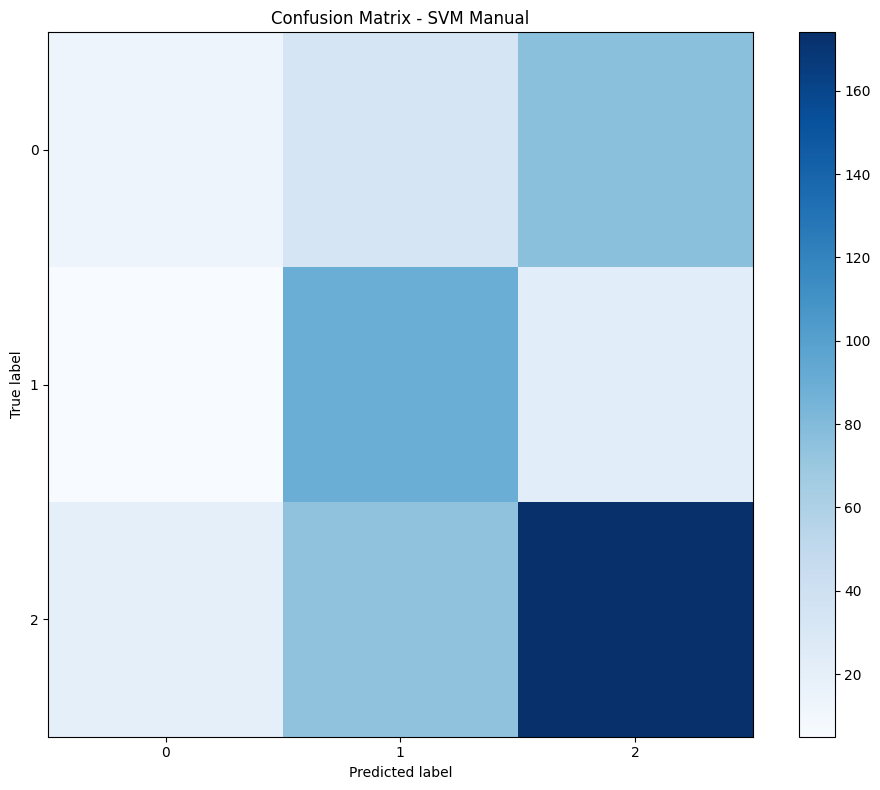


L∆∞u m√¥ h√¨nh Support Vector Machine (SVM)...
ƒê√£ l∆∞u m√¥ h√¨nh v√†o file 'svm_model.pkl'
SVM Manual ƒë√£ ch·∫°y xong!


In [239]:
# V·∫Ω bi·ªÉu ƒë·ªì confusion matrix
plt.figure(figsize=(10, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - SVM Manual')
plt.colorbar()

classes = np.unique(y_test)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

# L∆∞u m√¥ h√¨nh
print("\nL∆∞u m√¥ h√¨nh Support Vector Machine (SVM)...")
with open('/content/drive/MyDrive/BTL_Data_Mining/Dataset/svm_model.pkl', 'wb') as f:
    pickle.dump(svm, f)
print("ƒê√£ l∆∞u m√¥ h√¨nh v√†o file 'svm_model.pkl'")

print("SVM Manual ƒë√£ ch·∫°y xong!")

### 6.3. Logistic Regression

In [227]:
# C√†i ƒë·∫∑t Logistic Regression
class LogisticRegression_Manual_Fast:
    def __init__(self, learning_rate=0.01, max_iter=500, tol=1e-4, C=1.0, batch_size=128):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.tol = tol
        self.C = C  # Regularization parameter
        self.batch_size = batch_size  # Mini-batch size
        self.weights = None
        self.bias = None
        self.classes = None
        self.feature_means = None  # L∆∞u trung b√¨nh c·ªßa c√°c ƒë·∫∑c tr∆∞ng
        self.feature_stds = None   # L∆∞u ƒë·ªô l·ªách chu·∫©n c·ªßa c√°c ƒë·∫∑c tr∆∞ng

    def sigmoid(self, z):
        # Clip ƒë·ªÉ tr√°nh overflow
        z = np.clip(z, -500, 500)
        return 1 / (1 + np.exp(-z))

    def softmax(self, z):
        # Clip v√† s·ª≠ d·ª•ng trick ·ªïn ƒë·ªãnh h√≥a
        z = np.clip(z, -500, 500)
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.classes = np.unique(y)
        n_classes = len(self.classes)

        # L∆∞u th√¥ng s·ªë chu·∫©n h√≥a
        self.feature_means = np.mean(X, axis=0)
        self.feature_stds = np.std(X, axis=0)

        # Kh·ªüi t·∫°o weights v√† bias
        self.weights = np.zeros((n_features, n_classes))
        self.bias = np.zeros(n_classes)

        # One-hot encoding cho y
        y_one_hot = np.zeros((n_samples, n_classes))
        for i, c in enumerate(self.classes):
            y_one_hot[:, i] = (y == c).astype(int)

        # Mini-batch Gradient Descent
        n_batches = max(1, n_samples // self.batch_size)
        prev_loss = float('inf')

        for iteration in range(self.max_iter):
            # Shuffle d·ªØ li·ªáu m·ªói epoch
            indices = np.random.permutation(n_samples)
            X_shuffled = X[indices]
            y_one_hot_shuffled = y_one_hot[indices]

            total_loss = 0

            # Duy·ªát qua c√°c mini-batch
            for batch in range(n_batches):
                start_idx = batch * self.batch_size
                end_idx = min((batch + 1) * self.batch_size, n_samples)

                X_batch = X_shuffled[start_idx:end_idx]
                y_batch = y_one_hot_shuffled[start_idx:end_idx]
                batch_size = end_idx - start_idx

                # Forward pass
                linear_output = np.dot(X_batch, self.weights) + self.bias
                y_pred = self.softmax(linear_output)

                # T√≠nh loss
                batch_loss = -np.mean(np.sum(y_batch * np.log(y_pred + 1e-15), axis=1))
                batch_loss += (self.C / (2 * batch_size)) * np.sum(self.weights ** 2)  # L2 regularization
                total_loss += batch_loss * batch_size

                # Backward pass - t√≠nh gradient
                error = y_pred - y_batch

                # Update weights v√† bias
                dw = (1 / batch_size) * np.dot(X_batch.T, error) + (self.C / batch_size) * self.weights
                db = (1 / batch_size) * np.sum(error, axis=0)

                self.weights -= self.learning_rate * dw
                self.bias -= self.learning_rate * db

            # T√≠nh average loss cho epoch
            avg_loss = total_loss / n_samples

            # Early stopping
            if abs(prev_loss - avg_loss) < self.tol:
                print(f"H·ªôi t·ª• sau {iteration+1} v√≤ng l·∫∑p. Loss: {avg_loss:.6f}")
                break

            prev_loss = avg_loss

            if iteration % 20 == 0:
                print(f"L·∫∑p {iteration}, Loss: {avg_loss:.6f}")

            # D·ª´ng s·ªõm n·∫øu ƒë√£ ch·∫°y nhi·ªÅu v√≤ng l·∫∑p
            if iteration >= 100:
                print(f"D·ª´ng s·ªõm sau {iteration+1} v√≤ng l·∫∑p")
                break

        return self

    def normalize_new_data(self, X):
        """Chu·∫©n h√≥a d·ªØ li·ªáu m·ªõi s·ª≠ d·ª•ng th√¥ng s·ªë ƒë√£ l∆∞u"""
        X_norm = X.copy()
        for i in range(X.shape[1]):
            if self.feature_stds[i] > 0:
                X_norm[:, i] = (X[:, i] - self.feature_means[i]) / self.feature_stds[i]
        return X_norm

    def predict_proba(self, X):
        # N·∫øu c√≥ th√¥ng s·ªë chu·∫©n h√≥a, √°p d·ª•ng chu·∫©n h√≥a cho d·ªØ li·ªáu ƒë·∫ßu v√†o
        if hasattr(self, 'feature_means') and hasattr(self, 'feature_stds'):
            X = self.normalize_new_data(X)

        linear_output = np.dot(X, self.weights) + self.bias
        return self.softmax(linear_output)

    def predict(self, X):
        probas = self.predict_proba(X)
        return self.classes[np.argmax(probas, axis=1)]

In [228]:
# H√†m t√¨m tham s·ªë t·ªëi ∆∞u - phi√™n b·∫£n nhanh
def find_best_parameters_fast(X_train, y_train, X_val, y_val):
    best_acc = 0
    best_params = {'learning_rate': 0.1, 'C': 1.0, 'max_iter': 200}  # M·∫∑c ƒë·ªãnh

    # Ch·ªâ th·ª≠ s·ªë l∆∞·ª£ng tham s·ªë gi·ªõi h·∫°n
    param_grid = [
        {'learning_rate': 0.1, 'C': 1.0, 'max_iter': 200},
        {'learning_rate': 0.01, 'C': 0.1, 'max_iter': 200},
        {'learning_rate': 0.1, 'C': 10.0, 'max_iter': 200}
    ]

    # S·ª≠ d·ª•ng t·∫≠p con nh·ªè h∆°n ƒë·ªÉ tƒÉng t·ªëc qu√° tr√¨nh t√¨m ki·∫øm
    subset_size = min(500, len(X_train))
    X_train_subset = X_train[:subset_size]
    y_train_subset = y_train[:subset_size]

    val_subset_size = min(200, len(X_val))
    X_val_subset = X_val[:val_subset_size]
    y_val_subset = y_val[:val_subset_size]

    for params in param_grid:
        print(f"\nTh·ª≠ tham s·ªë: {params}")
        start_time = time.time()

        logistic = LogisticRegression_Manual_Fast(
            learning_rate=params['learning_rate'],
            C=params['C'],
            max_iter=params['max_iter'],
            batch_size=64  # Batch size nh·ªè ƒë·ªÉ tƒÉng t·ªëc
        )

        logistic.fit(X_train_subset, y_train_subset)
        y_pred = logistic.predict(X_val_subset)
        acc = accuracy_score(y_val_subset, y_pred)

        elapsed = time.time() - start_time
        print(f"Accuracy: {acc:.4f}, Th·ªùi gian: {elapsed:.2f}s")

        if acc > best_acc:
            best_acc = acc
            best_params = params.copy()

    print(f"\nTham s·ªë t·ªët nh·∫•t: {best_params}, accuracy: {best_acc:.4f}")
    return best_params

In [229]:
# Chu·∫©n h√≥a d·ªØ li·ªáu
def normalize_data(X):
    X_norm = X.copy()
    for i in range(X.shape[1]):
        feature_mean = np.mean(X[:, i])
        feature_std = np.std(X[:, i])
        if feature_std > 0:
            X_norm[:, i] = (X[:, i] - feature_mean) / feature_std
    return X_norm

print(f"D·ªØ li·ªáu ƒë√£ t·∫£i: X_train: {X_train.shape}, y_train: {y_train.shape}, X_test: {X_test.shape}")

# ƒê·∫£m b·∫£o d·ªØ li·ªáu ƒë·∫ßu v√†o l√† ndarray, kh√¥ng ph·∫£i pandas Series
if isinstance(y_train, pd.Series):
    print("Chuy·ªÉn ƒë·ªïi y_train t·ª´ pandas Series sang numpy array")
    y_train = y_train.to_numpy()
if isinstance(X_train, pd.DataFrame):
    print("Chuy·ªÉn ƒë·ªïi X_train t·ª´ pandas DataFrame sang numpy array")
    X_train = X_train.to_numpy()
if isinstance(X_test, pd.DataFrame):
    print("Chuy·ªÉn ƒë·ªïi X_test t·ª´ pandas DataFrame sang numpy array")
    X_test = X_test.to_numpy()
if isinstance(y_test, pd.Series):
    print("Chuy·ªÉn ƒë·ªïi y_test t·ª´ pandas Series sang numpy array")
    y_test = y_test.to_numpy()

# S·ª≠ d·ª•ng t·∫≠p con d·ªØ li·ªáu ƒë·ªÉ tƒÉng t·ªëc
print("S·ª≠ d·ª•ng m·ªôt ph·∫ßn d·ªØ li·ªáu ƒë·ªÉ tƒÉng t·ªëc...")
sample_size = min(2000, X_train.shape[0])  # T·ªëi ƒëa 2000 m·∫´u
indices = np.random.choice(X_train.shape[0], sample_size, replace=False)
X_train_sample = X_train[indices]
y_train_sample = y_train[indices]

# Chu·∫©n h√≥a d·ªØ li·ªáu
X_train_norm = normalize_data(X_train_sample)
X_test_norm = normalize_data(X_test)

# T·∫°o t·∫≠p validation nh·ªè
print("T·∫°o t·∫≠p validation...")
val_size = int(0.2 * len(X_train_norm))
X_train_opt = X_train_norm[:-val_size]
y_train_opt = y_train_sample[:-val_size]
X_val = X_train_norm[-val_size:]
y_val = y_train_sample[-val_size:]

print("T√¨m tham s·ªë t·ªëi ∆∞u (phi√™n b·∫£n nhanh)...")
start_time = time.time()
best_params = find_best_parameters_fast(X_train_opt, y_train_opt, X_val, y_val)
print(f"T·ªïng th·ªùi gian t√¨m tham s·ªë: {time.time() - start_time:.2f}s")

# Hu·∫•n luy·ªán m√¥ h√¨nh cu·ªëi c√πng v·ªõi tham s·ªë t·ªëi ∆∞u
print("Hu·∫•n luy·ªán m√¥ h√¨nh cu·ªëi c√πng v·ªõi tham s·ªë t·ªëi ∆∞u...")
start_time = time.time()
logistic = LogisticRegression_Manual_Fast(
    learning_rate=best_params['learning_rate'],
    C=best_params['C'],
    max_iter=best_params['max_iter'],
    batch_size=128  # Batch size l·ªõn h∆°n cho m√¥ h√¨nh cu·ªëi c√πng
)
logistic.fit(X_train_norm, y_train_sample)
train_time = time.time() - start_time
print(f"Th·ªùi gian hu·∫•n luy·ªán: {train_time:.2f}s")

# ƒê√°nh gi√° tr√™n t·∫≠p test
print("ƒê√°nh gi√° tr√™n t·∫≠p test...")
start_time = time.time()
y_pred = logistic.predict(X_test_norm)
test_time = time.time() - start_time
print(f"Th·ªùi gian d·ª± ƒëo√°n: {test_time:.2f}s")

accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy tr√™n t·∫≠p test: {accuracy:.4f}")

# In confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# In classification report
cr = classification_report(y_test, y_pred)
print("Classification Report:")
print(cr)

D·ªØ li·ªáu ƒë√£ t·∫£i: X_train: (2028, 3004), y_train: (2028,), X_test: (508, 3004)
S·ª≠ d·ª•ng m·ªôt ph·∫ßn d·ªØ li·ªáu ƒë·ªÉ tƒÉng t·ªëc...
T·∫°o t·∫≠p validation...
T√¨m tham s·ªë t·ªëi ∆∞u (phi√™n b·∫£n nhanh)...

Th·ª≠ tham s·ªë: {'learning_rate': 0.1, 'C': 1.0, 'max_iter': 200}
L·∫∑p 0, Loss: 0.858396
L·∫∑p 20, Loss: 0.111341
L·∫∑p 40, Loss: 0.096873
L·∫∑p 60, Loss: 0.093868
L·∫∑p 80, Loss: 0.090028
H·ªôi t·ª• sau 85 v√≤ng l·∫∑p. Loss: 0.088754
Accuracy: 0.5700, Th·ªùi gian: 1.55s

Th·ª≠ tham s·ªë: {'learning_rate': 0.01, 'C': 0.1, 'max_iter': 200}
L·∫∑p 0, Loss: 0.926274
L·∫∑p 20, Loss: 0.293683
L·∫∑p 40, Loss: 0.202919
H·ªôi t·ª• sau 55 v√≤ng l·∫∑p. Loss: 0.169215
Accuracy: 0.5700, Th·ªùi gian: 0.88s

Th·ª≠ tham s·ªë: {'learning_rate': 0.1, 'C': 10.0, 'max_iter': 200}
L·∫∑p 0, Loss: 0.942406
L·∫∑p 20, Loss: 0.291065
H·ªôi t·ª• sau 24 v√≤ng l·∫∑p. Loss: 0.296911
Accuracy: 0.5750, Th·ªùi gian: 0.47s

Tham s·ªë t·ªët nh·∫•t: {'learning_rate': 0.1, 'C': 10.0, 'max_iter': 200}, acc

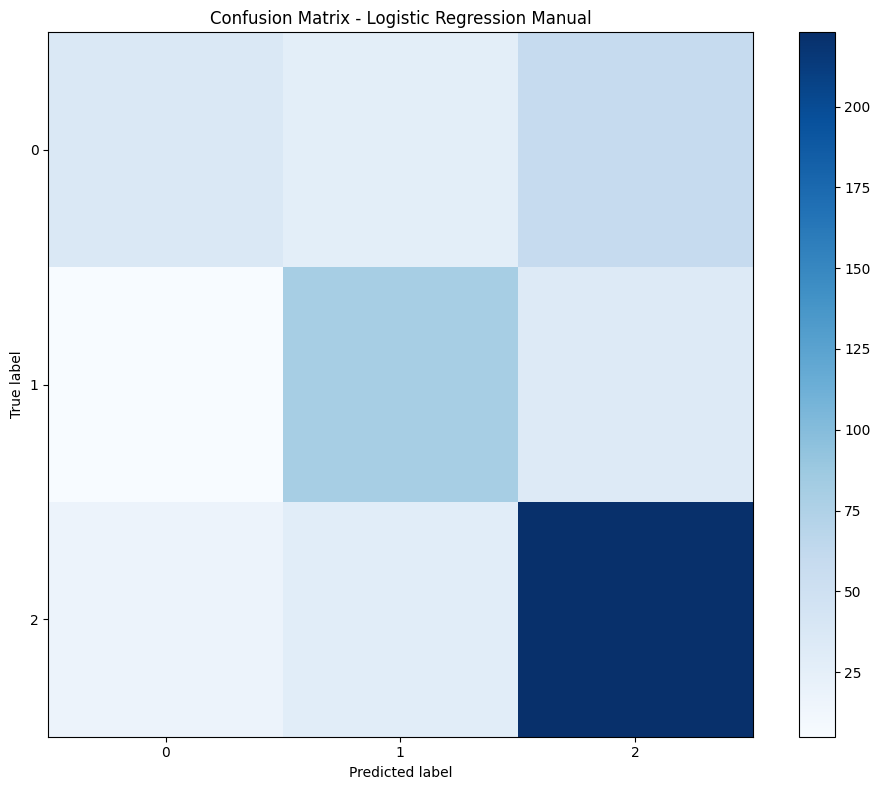

In [230]:
# V·∫Ω confusion matrix
plt.figure(figsize=(10, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Logistic Regression Manual')
plt.colorbar()

classes = np.unique(y_test)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

In [231]:
# Ki·ªÉm tra feature importance
if logistic.weights is not None:
    feature_importance = np.sum(np.abs(logistic.weights), axis=1)
    top_features_idx = np.argsort(feature_importance)[-10:]  # Gi·∫£m xu·ªëng 10 features
    print("\nTop 10 features quan tr·ªçng nh·∫•t:")

    for i, idx in enumerate(reversed(top_features_idx)):
        print(f"Feature {idx}: {feature_importance[idx]:.4f}")

print("Logistic Regression Manual ƒë√£ ho√†n th√†nh!")

# L∆∞u m√¥ h√¨nh
print("\nL∆∞u m√¥ h√¨nh Logistic Regression...")
with open('/content/drive/MyDrive/BTL_Data_Mining/Dataset/logistic_regression_model.pkl', 'wb') as f:
    pickle.dump(logistic, f)
print("ƒê√£ l∆∞u m√¥ h√¨nh v√†o file 'logistic_regression_model.pkl'")


Top 10 features quan tr·ªçng nh·∫•t:
Feature 1133: 0.3374
Feature 1395: 0.3350
Feature 1425: 0.3066
Feature 1443: 0.3058
Feature 2417: 0.2794
Feature 249: 0.2735
Feature 2989: 0.2499
Feature 1062: 0.2469
Feature 691: 0.2443
Feature 2927: 0.2385
Logistic Regression Manual ƒë√£ ho√†n th√†nh!

L∆∞u m√¥ h√¨nh Logistic Regression...
ƒê√£ l∆∞u m√¥ h√¨nh v√†o file 'logistic_regression_model.pkl'


## 7. Demo m√¥ h√¨nh

In [ ]:
# H√†m t·∫°o ƒë·∫∑c tr∆∞ng th·ªß c√¥ng cho 1 c√¢u
def handcrafted_features(comment):
    length = len(comment.split())
    num_exclamation = comment.count('<EXCLAMATION>')
    num_question = comment.count('<QUESTION>')
    num_num = comment.count('<NUM>')
    return np.array([[length, num_exclamation, num_question, num_num]])

while True:
    new_comment = input("Nh·∫≠p b√¨nh lu·∫≠n (ho·∫∑c g√µ 'exit' ƒë·ªÉ tho√°t): ").strip()
    if new_comment.lower() == "exit":
        break

    # Vector h√≥a BoW
    X_bow_new = bow_vectorizer.transform([new_comment])
    # ƒê·∫∑c tr∆∞ng th·ªß c√¥ng
    X_handcrafted_new = handcrafted_features(new_comment)
    # K·∫øt h·ª£p
    X_bow_hand_new = np.hstack([X_bow_new.toarray(), X_handcrafted_new])

    # D·ª± ƒëo√°n x√°c su·∫•t
    if hasattr(best_model, "predict_proba"):
        probs = best_model.predict_proba(X_bow_hand_new)[0]
    else:
        print("Model kh√¥ng h·ªó tr·ª£ d·ª± ƒëo√°n x√°c su·∫•t. ƒêang d·ª± ƒëo√°n nh√£n th√¥i.")
        probs = None

    pred_label = best_model.predict(X_bow_hand_new)[0]
    sentiment_pred = le.inverse_transform([pred_label])[0]

    if probs is not None:
        for idx, cls in enumerate(le.classes_):
            print(f"{cls}: {probs[idx]*100:.2f}%")
        print(f"K·∫øt lu·∫≠n: B√¨nh lu·∫≠n c√≥ c·∫£m x√∫c '{sentiment_pred}' v·ªõi ƒë·ªô tin c·∫≠y {np.max(probs)*100:.2f}%")
    else:
        print(f"K·∫øt lu·∫≠n: B√¨nh lu·∫≠n c√≥ c·∫£m x√∫c '{sentiment_pred}'")

    print("-" * 40)


Nh·∫≠p b√¨nh lu·∫≠n (ho·∫∑c g√µ 'exit' ƒë·ªÉ tho√°t): ‚ÄúWe have a about a zillion iPhones in a Chinese warehouse and need a few weeks to get those in, or we will start calling for your head‚Äù
negative: 70.63%
neutral: 1.56%
positive: 27.81%
K·∫øt lu·∫≠n: B√¨nh lu·∫≠n c√≥ c·∫£m x√∫c 'negative' v·ªõi ƒë·ªô tin c·∫≠y 70.63%
----------------------------------------
Nh·∫≠p b√¨nh lu·∫≠n (ho·∫∑c g√µ 'exit' ƒë·ªÉ tho√°t): "We're naming this one iphone '47... its never been done before"
negative: 25.26%
neutral: 37.42%
positive: 37.32%
K·∫øt lu·∫≠n: B√¨nh lu·∫≠n c√≥ c·∫£m x√∫c 'neutral' v·ªõi ƒë·ªô tin c·∫≠y 37.42%
----------------------------------------
Nh·∫≠p b√¨nh lu·∫≠n (ho·∫∑c g√µ 'exit' ƒë·ªÉ tho√°t): exit
